<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>✨ Predicting House Price ✨</b></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 🎬 Introduction 🎬</b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

   
  
<h3 align="left"><font color=purple>📝 Project Objective:</font></h3><br>

    
1. The aim of this project is to <b>train a Machine Learning Model</b> which can predict the <b>House Sale Price</b> using various relevant features.<br>
2. This project is completely based for <b>House Prices - Advanced Regression Techniques</b> Kaggle Competition.<br>
3. With <b>79 explanatory variables</b> describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges us to predict the final price of each home.<br>
4. Dataset Link:- <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data">Click to get the Dataset</a>
<br>
    
    
    
<h3 align="left"><font color=purple>🌟 Business Understanding:</font></h3><br>

1. In the dynamic real estate market, the significance of <b>accurate house price predictions</b> is increasing significantly, as they have the potential to empower homeowners, buyers, and real estate professionals by providing valuable insights into property values and facilitating informed decision-making.<br>

    
2. As a result, the <b>real estate industry faces the crucial task of determining the appropriate pricing for houses</b> before listing them on the market. This is achieved through a comprehensive analysis of various property attributes such as location, size, amenities, condition, market trends, and more.<br>

    
3. Analyzing <b>house attributes to determine pricing</b> helps the real estate industry strike a balance between fair market value for sellers and affordability for buyers. It ensures that house prices align with their unique characteristics, desirability, and overall value proposition. This approach also fosters <b>transparency and facilitates fair competition</b> among properties, allowing buyers to make well-informed decisions based on their specific needs, preferences, and budget constraints. Moreover, accurate house price predictions enable homeowners to assess their property's worth and make informed choices regarding selling, refinancing, or investment opportunities.<br>
</div>
</div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📝 Project Contents 📝</b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:16px">

<h3 align="left"><font color=purple>📊 Table of Contents:</font></h3><br>
    
    
1. <b>📚 Importing Libraries:</b> - To perform <b>Data Manipulation,Visualization & Model Building.</b><br>
    
    
2. <b>⏳ Loading Dataset:</b> - Load the dataset into a <b>suitable data structure using pandas.</b><br>

    
3. <b>🧠 Basic Understaning of Data:</b> - Generate basic informations about the data.<br>
    
    
4. <b>🧹 Data Preprocessing Part-1:</b> - To <b>clean, transform, and restructure</b> the data in order to make it suitable for analysis.<br>

    
5. <b>📊 Exploatory Data Analysis:</b> -  To  identify <b>trends, patterns, and relationships</b> among the variabels.<br>

    
6. <b>📈 Feature Engineering:</b> -  To create <b>new relevant features</b> for model building.<br>
    
    
7. <b>⚙️ Data Preprocessing Part-2:</b> - To transform data for creating more accurate & robust model.<br>
    
    
8. <b>🎯 Model building:</b>- To build <b>predictive models</b>, using various algorithms.<br>
    
    
9. <b>⚡️ Model evaluation:</b> - To analyze the Model performance using metrics.<br>
    

10. <b>🌟 Hyper-Parameter Tunning:</b> - Optimiging model using best parameters.<br>
    
    
11. <b>🍀 Stacking Model:</b>- To develop a stacked model using the top performing models.<br>


11. <b>🎈 Conclusion:</b> - Conclude the project by summarizing the <b>key findings.</b><br>
    
</div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📚 Importing Libraries 📚</b></div>

In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳ Loading Datset ⏳</b></div>

In [225]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [226]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧠 Basic Understanding of Data 🧠</b></div>

### 1. Checking Dimension of the Datasets.

In [227]:
print("Train Dataset has ",df_train.shape[0],"Records/Rows and ",df_train.shape[1],"attributes/columns.")
print("Test Dataset has ",df_test.shape[0],"Records/Rows and ",df_test.shape[1],"attributes/columns.")

Train Dataset has  1460 Records/Rows and  81 attributes/columns.
Test Dataset has  1459 Records/Rows and  80 attributes/columns.


---

### 2. Generating Basic Information of Train Data.

In [228]:
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is total **1460 records/rows** and **81 attributes/columns.**
* Out of **81 columns**, **38 columns are numerical** and **43 columns are categorical.**

---

### 3. Performing Descriptive Statistical Analysis on Categorical Features.

In [229]:
df_train.describe(include="object")

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **None of the categorical features** are having **high cardinality.**
* **Features** like **`Neighborhood`**, **`Exterior1st`**, **`Exterior2nd`** are having **little bit of high cardinality** but that can be **manged** using different techniques of **encoding.**

---

### 4. Performing Descriptive Statistical Analysis on Numerical Features.

In [230]:
df_train.describe(include=[int,float])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Numerical Features** like **`LotArea`**, **`BsmtFinSF1`**,**`BsmtUnfSF`**, **`TotalBsmtSF`**,**`GrLivArea`**, **`MiscVal`** and even the target feature **SalePrice** is having **very high deviation** values which can **lead to bias, Overfitting, and can affect the accuracy of the model.**
* So we have to use **different transformation technique** to reduce the deviation between the data-points.

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⚙️ Data Preprocessing - Part 1 ⚙️</b></div>

### 1. Showing Random Sample of the Dataset.

In [231]:
df_train.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
228  229          20       RL         70.0     8521   Pave   NaN      Reg   
172  173         160       RL         44.0     5306   Pave   NaN      IR1   
408  409          60       RL        109.0    14154   Pave   NaN      Reg   
819  820         120       RL         44.0     6371   Pave   NaN      IR1   
621  622          60       RL         90.0    10800   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
228         Lvl    AllPub       FR2       Gtl       Sawyer      Feedr   
172         Lvl    AllPub    Inside       Gtl      StoneBr       Norm   
408         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
819         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
621         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
228       Norm     1Fam     1Story            5            5       1967   
172       Norm   TwnhsE     2Story            7            7       1987   
408       Norm     1Fam     2Story            7            5       2006   
819       Norm   TwnhsE     1Story            7            5       2009   
621       Norm     1Fam     2Story            6            7       1974   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
228          1967     Gable  CompShg     HdBoard     HdBoard        NaN   
172          1987     Gable  CompShg     HdBoard     HdBoard        NaN   
408          2006     Gable  CompShg     VinylSd     VinylSd    BrkFace   
819          2010     Gable  CompShg     VinylSd     VinylSd      Stone   
621          1997     Gable  CompShg     HdBoard     HdBoard        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
228         0.0        TA        TA     CBlock       TA       TA           No   
172         0.0        Gd        Gd      PConc       Gd       Gd           No   
408       350.0        Gd        TA      PConc       Ex       Gd           No   
819       128.0        Gd        TA      PConc       Gd       TA           Mn   
621         0.0        TA        TA     CBlock       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
228          ALQ         842          Unf           0         70          912   
172          GLQ         495          Rec         215        354         1064   
408          Unf           0          Unf           0       1063         1063   
819          GLQ         733          Unf           0        625         1358   
621          ALQ         956          Rec         182        384         1522   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
228    GasA        TA          Y      SBrkr       912         0             0   
172    GasA        Gd          Y      SBrkr      1064       703             0   
408    GasA        Ex          Y      SBrkr      1071      1101             0   
819    GasA        Ex          Y      SBrkr      1358         0             0   
621    GasA        TA          Y      SBrkr      1548      1066             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
228        912             0             0         1         0             3   
172       1767             1             0         2         0             2   
408       2172             0             0         2         1             3   
819       1358             1             0         2         0             2   
621       2614             0             0         2         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
228             1          TA             5        Typ           1   
172             1          Gd             5        Typ           1   
408             1          Gd             9       

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can observe that feature named **Id** represnt a **index number** to each records in the dataset.
* This feature **doesn't seem relevant** for the **analysis**, so we can simply **drop this feature.**

### 2. Dropping "Id" Feature.

In [232]:
test_id = df_test["Id"]    ##Storing test id because we need it for subission file.
df_train.drop(columns="Id",inplace=True)
df_test.drop(columns="Id",inplace=True)

---

### 3. Computing Features with Missing Values More Than 45%.

In [233]:
null_df = round(df_train.isnull().sum()/len(df_train)*100,2).sort_values().to_frame().rename(columns=
                                                                                    {0:"Train % of Missing Values"})
null_df["Test % of Missing Values"] = round(df_test.isnull().sum()/len(df_train)*100,2)

In [234]:
null_df[(null_df["Train % of Missing Values"]>45) | (null_df["Test % of Missing Values"]>45)]

Train % of Missing Values  Test % of Missing Values
FireplaceQu                      47.26                     50.00
MasVnrType                       59.73                     61.23
Fence                            80.75                     80.07
Alley                            93.77                     92.60
MiscFeature                      96.30                     96.44
PoolQC                           99.52                     99.73

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Features like **`PoolQC`**,**`MiscFeature`**, **`Alley`** & **`Fence`** are **having large number of missing values.**
* **Data Imputation** in features with **large scale of misisng values** can lead to **bias & noise** in the dataset.
* So we can simply **drop** those features with **large scale of missing values.**

---

### 4. Dropping Features with more than 45% of Missing Values.

In [235]:
cols = ["FireplaceQu","Fence","Alley","MiscFeature","PoolQC"]

df_train.drop(columns=cols, inplace=True)
df_test.drop(columns=cols, inplace=True)

---

### 5. Combining Train & Test Dataset for Easier Analysis.

In [236]:
target = df_train[["SalePrice"]].reset_index(drop=True)

df_train.drop(columns=["SalePrice"],inplace=True)

df = pd.concat([df_train,df_test]).reset_index(drop=True)

In [237]:
df.shape

(2919, 74)

---

### 6. Computing Total Missing Values and % of Misisng Values.

In [238]:
null_df = df.isnull().sum()[df.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df)*100,2)
null_df["Feature Data Type"] = df[null_df.index.tolist()].dtypes

In [239]:
null_df

Total Missing values  % of Missing Values Feature Data Type
BsmtUnfSF                        1                 0.03           float64
GarageArea                       1                 0.03           float64
GarageCars                       1                 0.03           float64
KitchenQual                      1                 0.03            object
Electrical                       1                 0.03            object
TotalBsmtSF                      1                 0.03           float64
BsmtFinSF2                       1                 0.03           float64
BsmtFinSF1                       1                 0.03           float64
SaleType                         1                 0.03            object
Exterior1st                      1                 0.03            object
Exterior2nd                      1                 0.03            object
BsmtHalfBath                     2                 0.07           float64
Utilities                        2                 0.07            object
Functional                       2                 0.07            object
BsmtFullBath                     2                 0.07           float64
MSZoning                         4                 0.14            object
MasVnrArea                      23                 0.79           float64
BsmtFinType1                    79                 2.71            object
BsmtFinType2                    80                 2.74            object
BsmtQual                        81                 2.77            object
BsmtCond                        82                 2.81            object
BsmtExposure                    82                 2.81            object
GarageType                     157                 5.38            object
GarageCond                     159                 5.45            object
GarageYrBlt                    159                 5.45           float64
GarageFinish                   159                 5.45            object
GarageQual                     159                 5.45            object
LotFrontage                    486                16.65           float64
MasVnrType                    1766                60.50            object

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Total **29 columns** are still having **missing values.**
* We will **fill missing values separately** in categorical and Numerical Columns.

---

### 7. Filling Missing Values in Features realted to Garage & Basement.

In [240]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col] = df[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].fillna('None')

---

### 8. Filling Missing Values in Categorical Columns.

In [241]:
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [242]:
cat_cols = ['Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical',
            'KitchenQual','Functional','SaleType']

imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer.fit_transform(df[cat_cols])

---

### 9. Filling Missing Values in Numerical Columns.

In [243]:
df["LotFrontage"] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df["MasVnrArea"]  = df.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF1"]  = df.groupby("BsmtFinType1")["BsmtFinSF1"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF2"]  = df.groupby("BsmtFinType2")["BsmtFinSF2"].transform(lambda x: x.fillna(x.median()))

In [244]:
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0.0)
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0.0)
df["TotalBsmtSF"]  = df["BsmtFinSF1"] + df["BsmtFinSF2"]
df["BsmtUnfSF"]    = df["BsmtUnfSF"].fillna(df["BsmtUnfSF"].median())

---

### 10. Confirming Filling of Missing Values.

In [245]:
print("Total Missing Values Left is:",df.isnull().sum().sum())

Total Missing Values Left is: 0


---

### 11. Separating Train and Test Datframe.

In [246]:
train_df = pd.concat([df.iloc[:len(target["SalePrice"]),:],target],axis=1)
test_df = df.iloc[len(target["SalePrice"]):,:]

In [247]:
print("Dimension of train data is:",train_df.shape)
print("Dimension of test data is:",test_df.shape)

Dimension of train data is: (1460, 75)
Dimension of test data is: (1459, 74)


---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>📊 Exploratory Data Analysis 📊</b></div>

### 1. Analyzing & Visualizing Target Varibele (SalePrice).

In [248]:
train_df["SalePrice"].describe().to_frame().T

count          mean           std      min       25%       50%  \
SalePrice  1460.0  180921.19589  79442.502883  34900.0  129975.0  163000.0   

                75%       max  
SalePrice  214000.0  755000.0

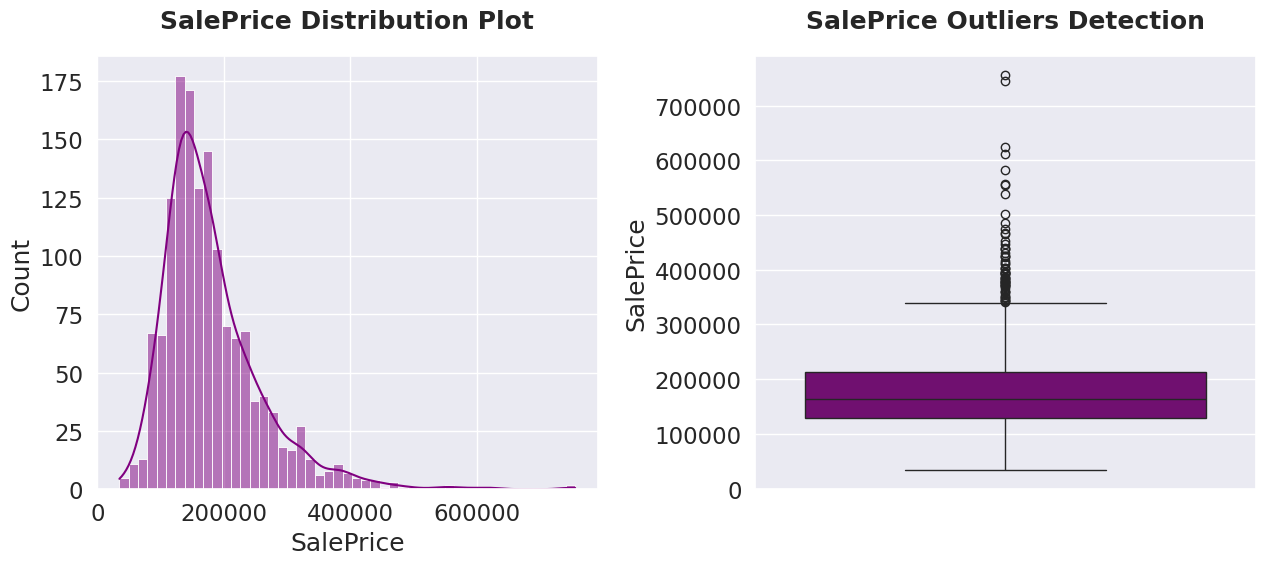

In [249]:
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
sns.histplot(train_df["SalePrice"],color="purple",kde=True)
plt.title("SalePrice Distribution Plot",fontweight="black",pad=20,size=18)

plt.subplot(1,2,2)
sns.boxplot(train_df["SalePrice"],color="purple")
plt.title("SalePrice Outliers Detection",fontweight="black",pad=20,size=18)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The target feature is having a **right-skewed distribution** due to presence of **positive outliers.**
* It is apparent that **SalePrice doesn't follow normal distribution**, so before performing regression it has to be transformed.
* To achieve a **Normal Distribution** we can use different **transformation techniques** like:
    * **`Johnsonsu Transformation`**, **`Norm Transformation`** or **`Log Noraml Transformation`**
    * From these three tansformation which ever **gives best fit** we can **use that transformation.**

----

### 2. Visualizing Different Transformation Techniques on "SalePrice" Attribute.

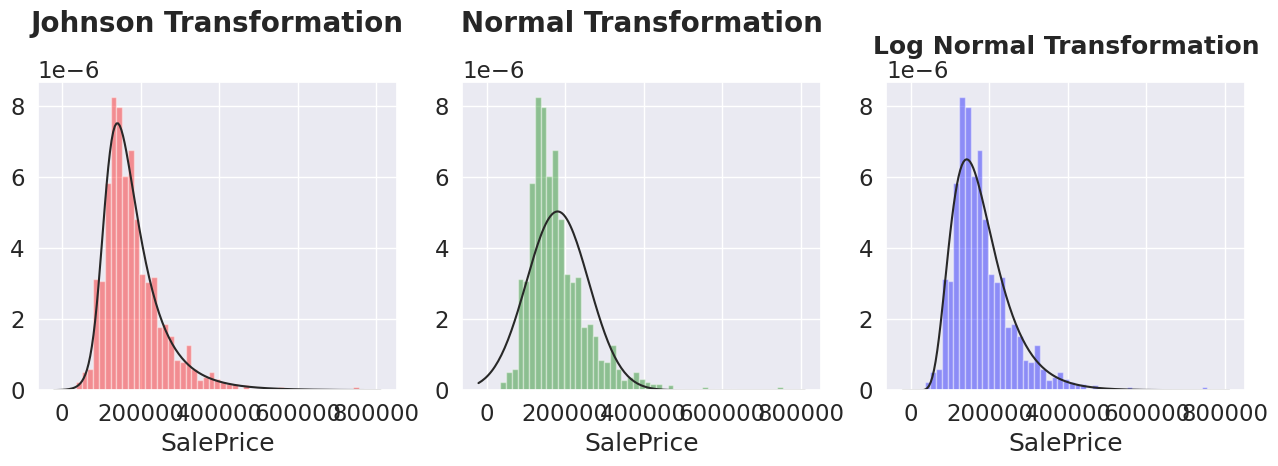

In [250]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.distplot(train_df["SalePrice"],kde=False, fit=stats.johnsonsu,color="red")
plt.title("Johnson Transformation",fontweight="black",size=20,pad=20)

plt.subplot(1,3,2)
sns.distplot(train_df["SalePrice"],kde=False, fit=stats.norm,color="green")
plt.title("Normal Transformation",fontweight="black",size=20,pad=20)

plt.subplot(1,3,3)
sns.distplot(train_df["SalePrice"],kde=False,fit=stats.lognorm,color="blue")
plt.title("Log Normal Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **After applying** different transformation techniques the best result were given by **`Unbounded Johnson Transformation`.**
    
* But the **`Log Normal Transformation`** has also done a good job to achieve a **`normal distribution.`**

---

### 3. Visualizing Distribution of Continous Numerical Features.

In [251]:
con_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
            "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
            "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

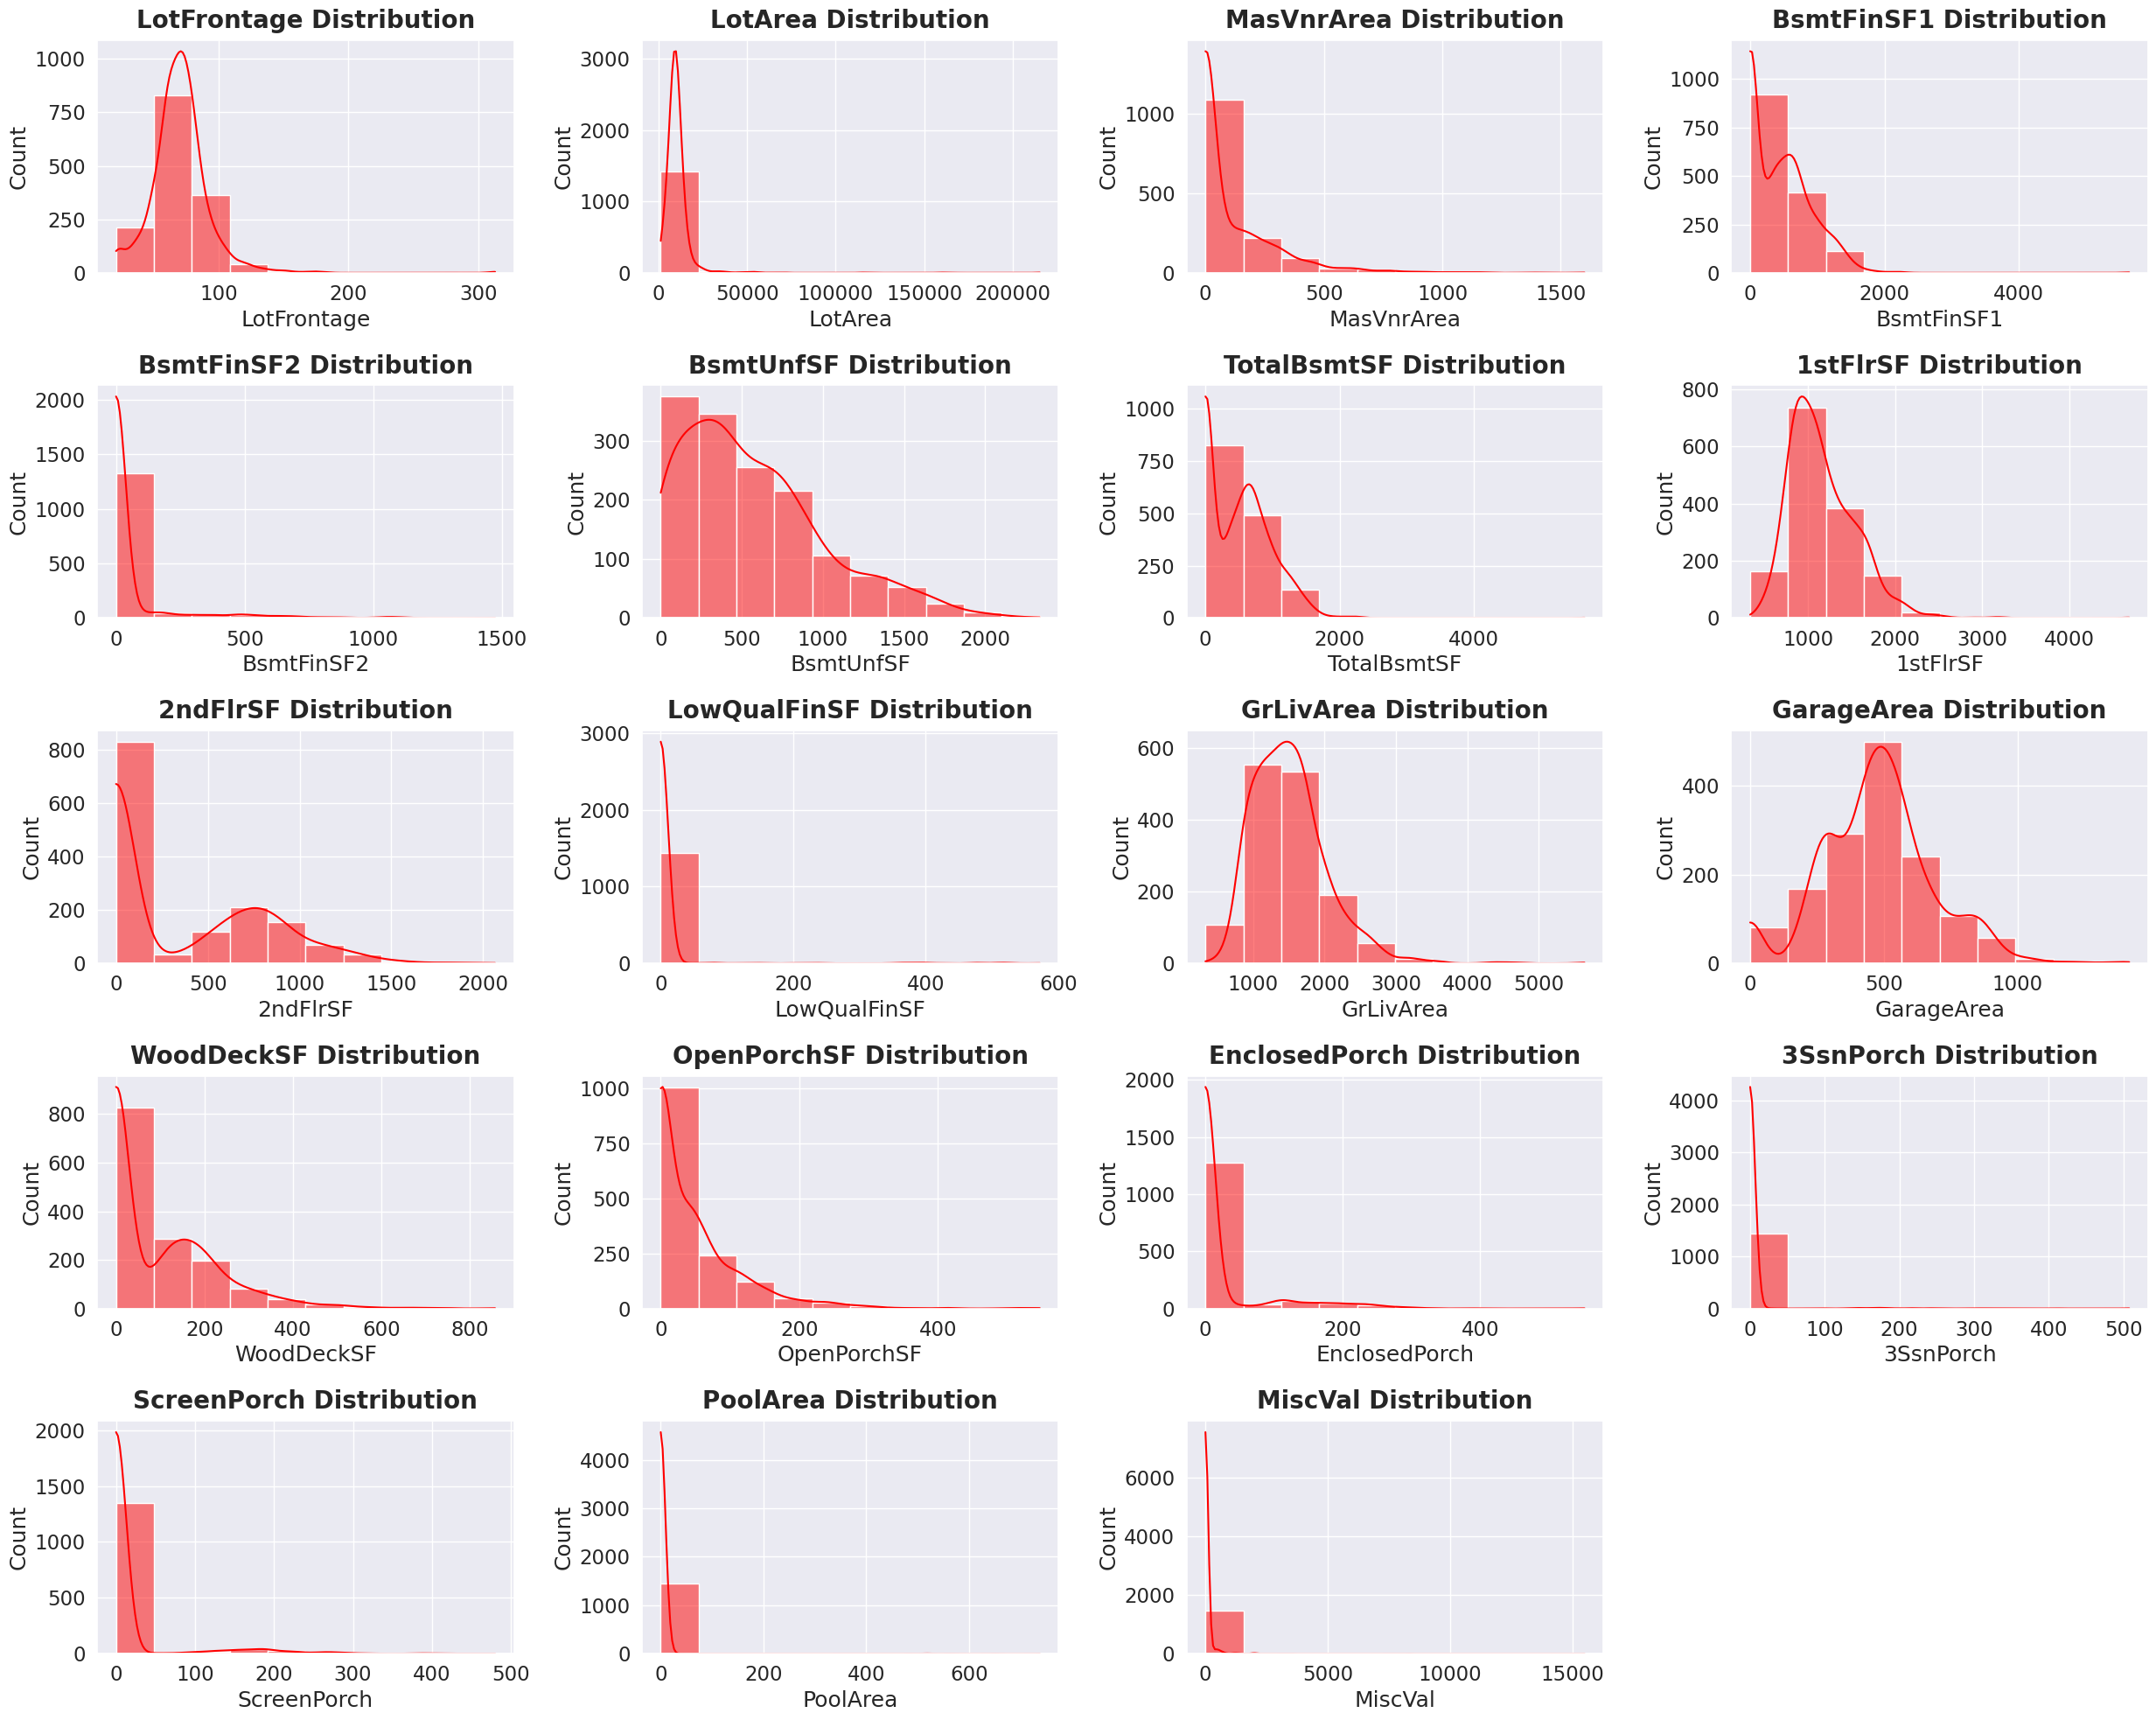

In [252]:
plt.figure(figsize=(25,20))
for index,column in enumerate(con_cols):
    plt.subplot(5,4,index+1)
    sns.histplot(train_df[column],bins=10,kde=True,color="red")
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **GargeArea Feature** is having a **kind of Normal Distribution.**
* **None of the other featurs** is having a **normal distribution** and all the features is **right-skewed.**
* We know that **Linear regression** models assume a **linear relationship** between the **predictors and the response variable.**
* Since the **relationship is non-linear, transforming** the variables can **help capture and represent the underlying non-linear relationship more accurately.**

---

### 4. Visualizing the Skewness of Continous Numerical Features.

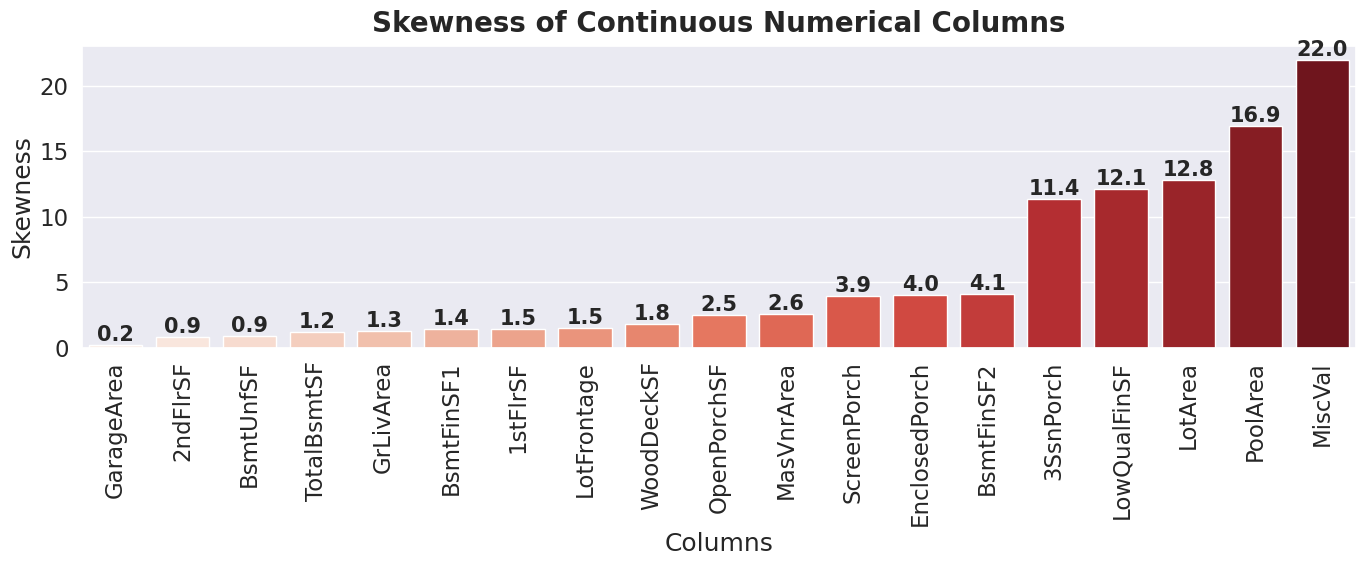

In [253]:
skewness = df[con_cols].skew().sort_values()

plt.figure(figsize=(14, 6))
sns.barplot(x=skewness.index, y=skewness, palette=sns.color_palette("Reds", 19))
for i, v in enumerate(skewness):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom", size=15, fontweight="black")

plt.ylabel("Skewness")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.title("Skewness of Continuous Numerical Columns", fontweight="black", size=20, pad=10)
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Features like **`3SsnPorch`**,**`LowQualFinSF`**,**`LotArea`**,**`PoolArea`** and **`MiscVal`** are having **extremly high skewness** which can **create model-complexity.**
* We know that **skewness** should be **near to zero** for a **normal distrbution** to achieve that we can use **different transformations.**

---

### 5. Visualizing the Correlation of Continous Numerical Features.

In [254]:
con_cols.append("SalePrice")

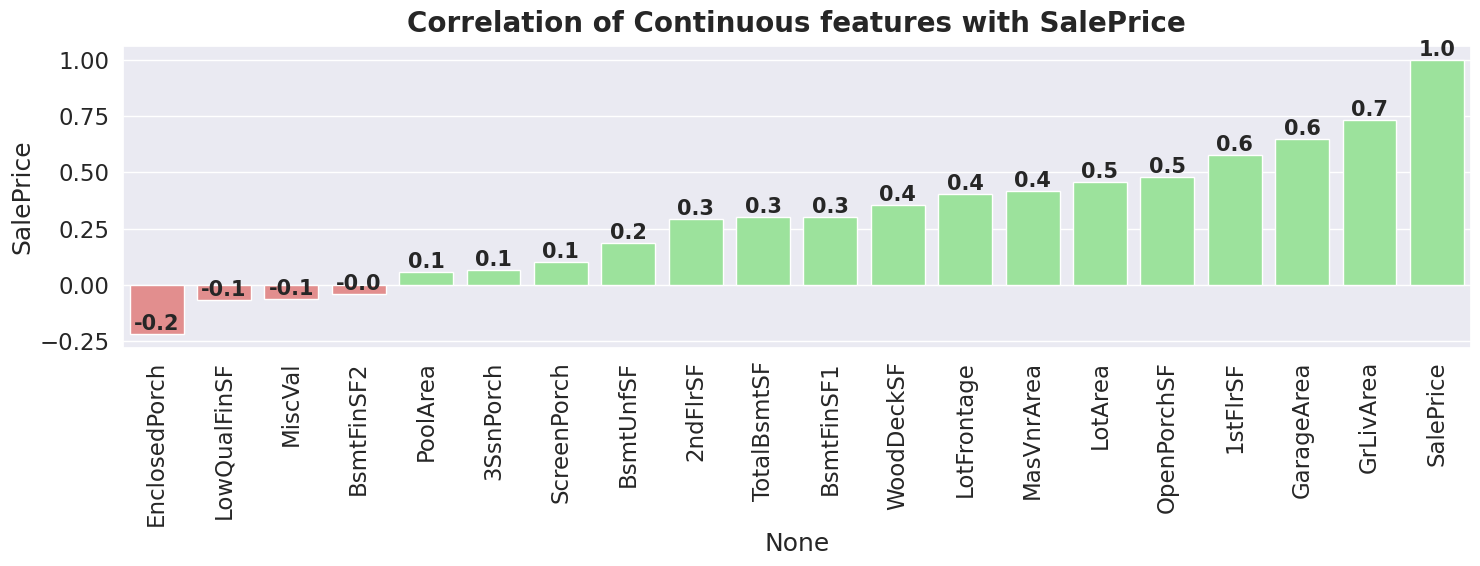

In [255]:
corr = train_df[con_cols].corr(method="spearman")["SalePrice"].sort_values()

plt.figure(figsize=(15, 6))
sns.barplot(x=corr.index, y=corr, palette=["lightcoral" if v < 0 else "lightgreen" for v in corr])
for i, v in enumerate(corr):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom", size=15, fontweight="black")

plt.title("Correlation of Continuous features with SalePrice", fontweight="black", size=20, pad=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Features like **`1stFlrSF`**,**`GrLivArea`**,and **`GarageArea`** are having **strong relation** with the target variable.
    
* Features like **`WoodDeckSF`**,**`LotDrontage`**,and **`MasVnrArea`** are having **modearte relation** with the target varible.
    
* Features like **`LowQualFinSF`**,**`MiscVal`**,**`BsmtFinSF2`**,**`PoolArea`**,**`3SsnPorch`**,and **`ScreenPorch`** are having **very low relation** with the target variable. So if required we can **drop this features,**

---

### 6. Visualizing Categorical Features w.r.t SalePrice.

In [256]:
cat_cols = train_df.select_dtypes(include="object").columns.tolist()

In [257]:
def boxplot(col_list):
    plt.figure(figsize=(22,12))
    for index,column in enumerate(col_list):
        plt.subplot(2,4,index+1)
        sns.boxplot(x=column, y="SalePrice", data=train_df)
        plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
        plt.xticks(rotation=90)
        plt.tight_layout()

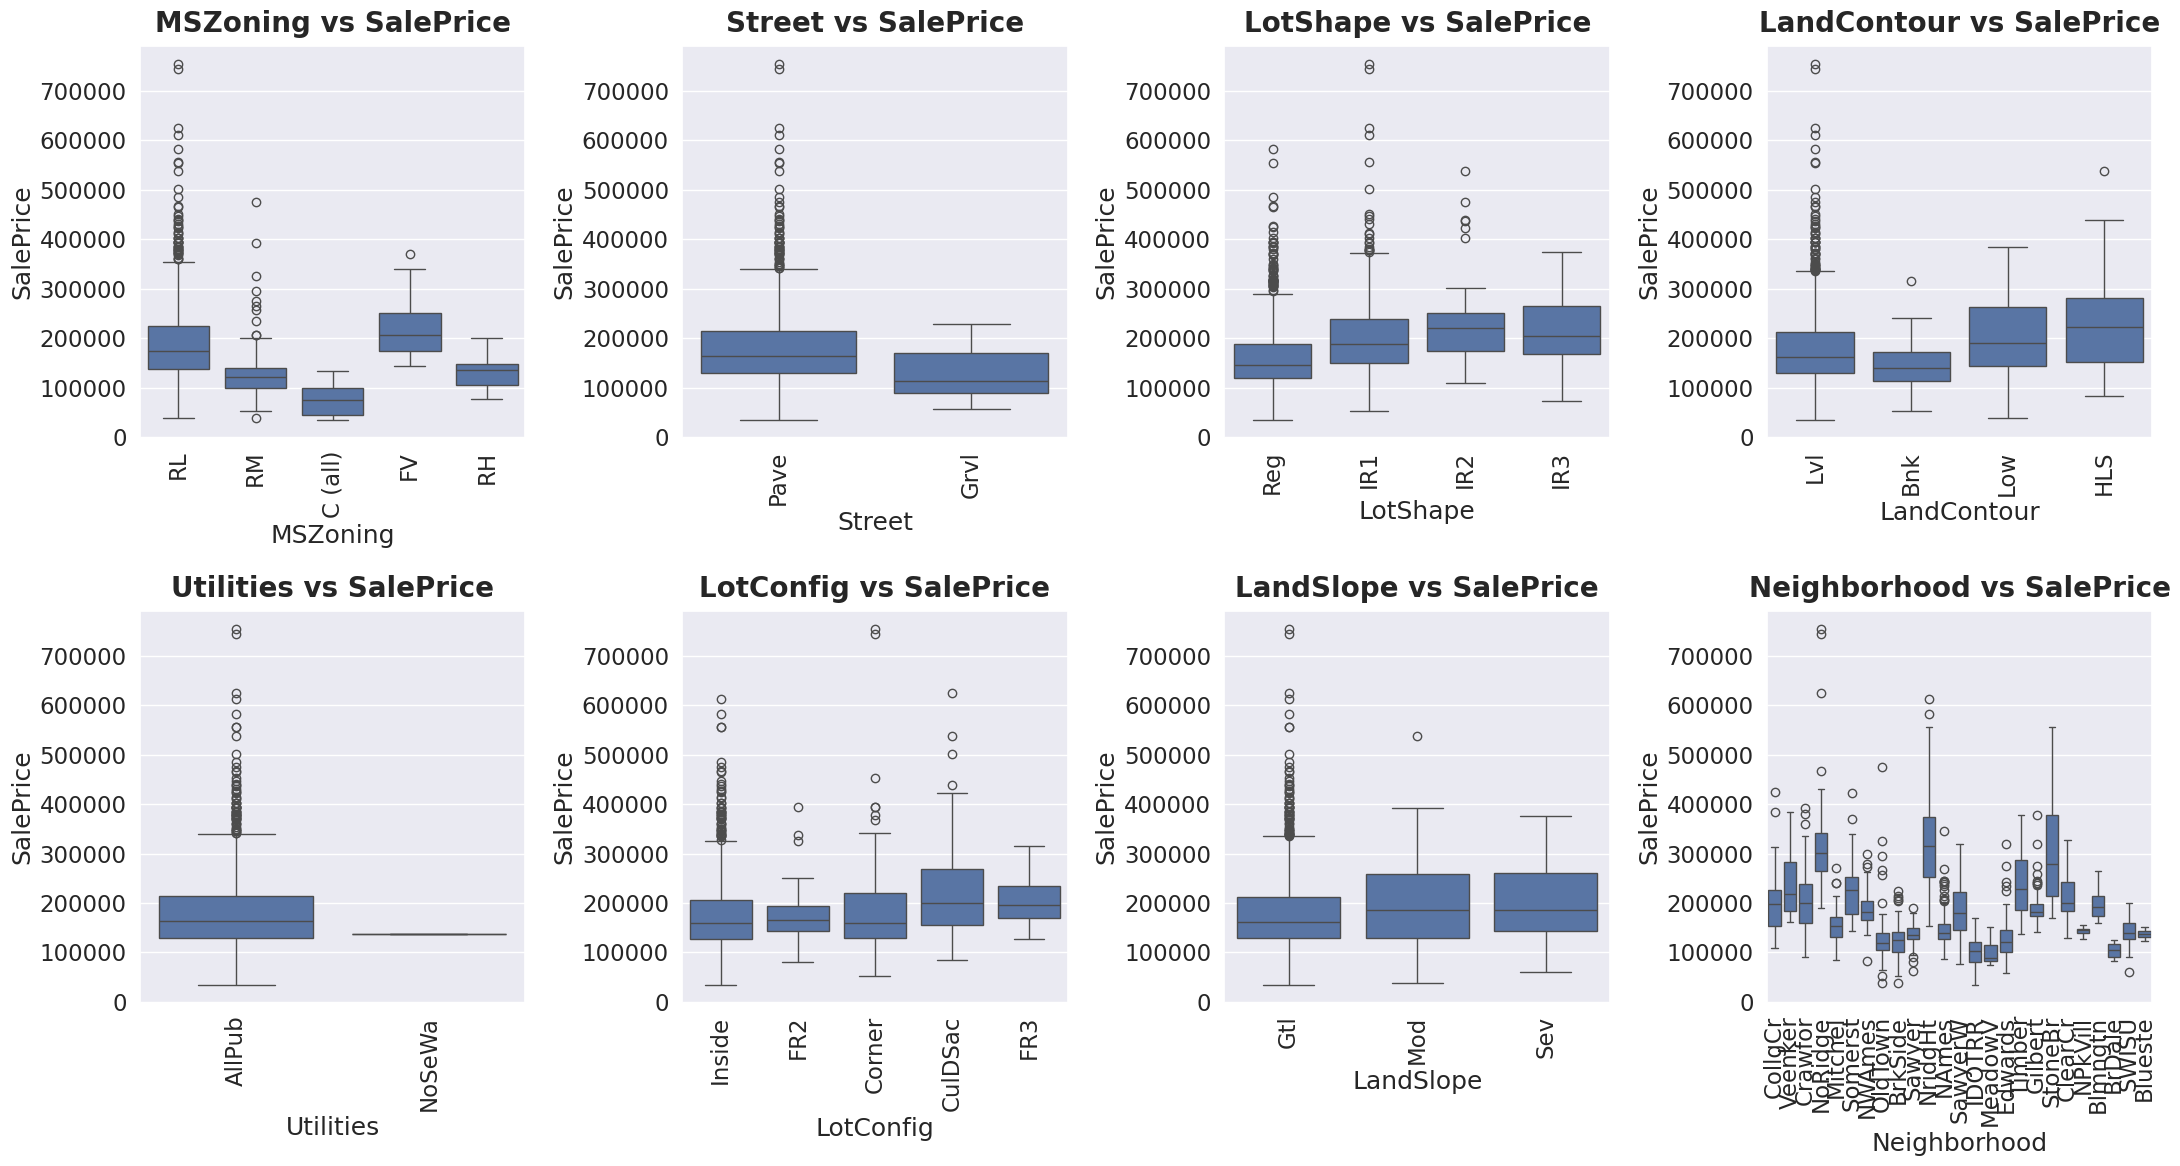

In [258]:
boxplot(cat_cols[0:8])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Features like **`Utilities`** and **`Street`** are having **very high class imbalance.** So we can **simply drop this features.**
* **Neighborhood** feature is having **high cardinality**, So we have to **perform Target Encoding** on this feature.

#### Dropping Columns with High Class-Imbalance.

In [259]:
train_df.drop(columns=["Utilities","Street"],inplace=True)
test_df.drop(columns=["Utilities","Street"],inplace=True)

---

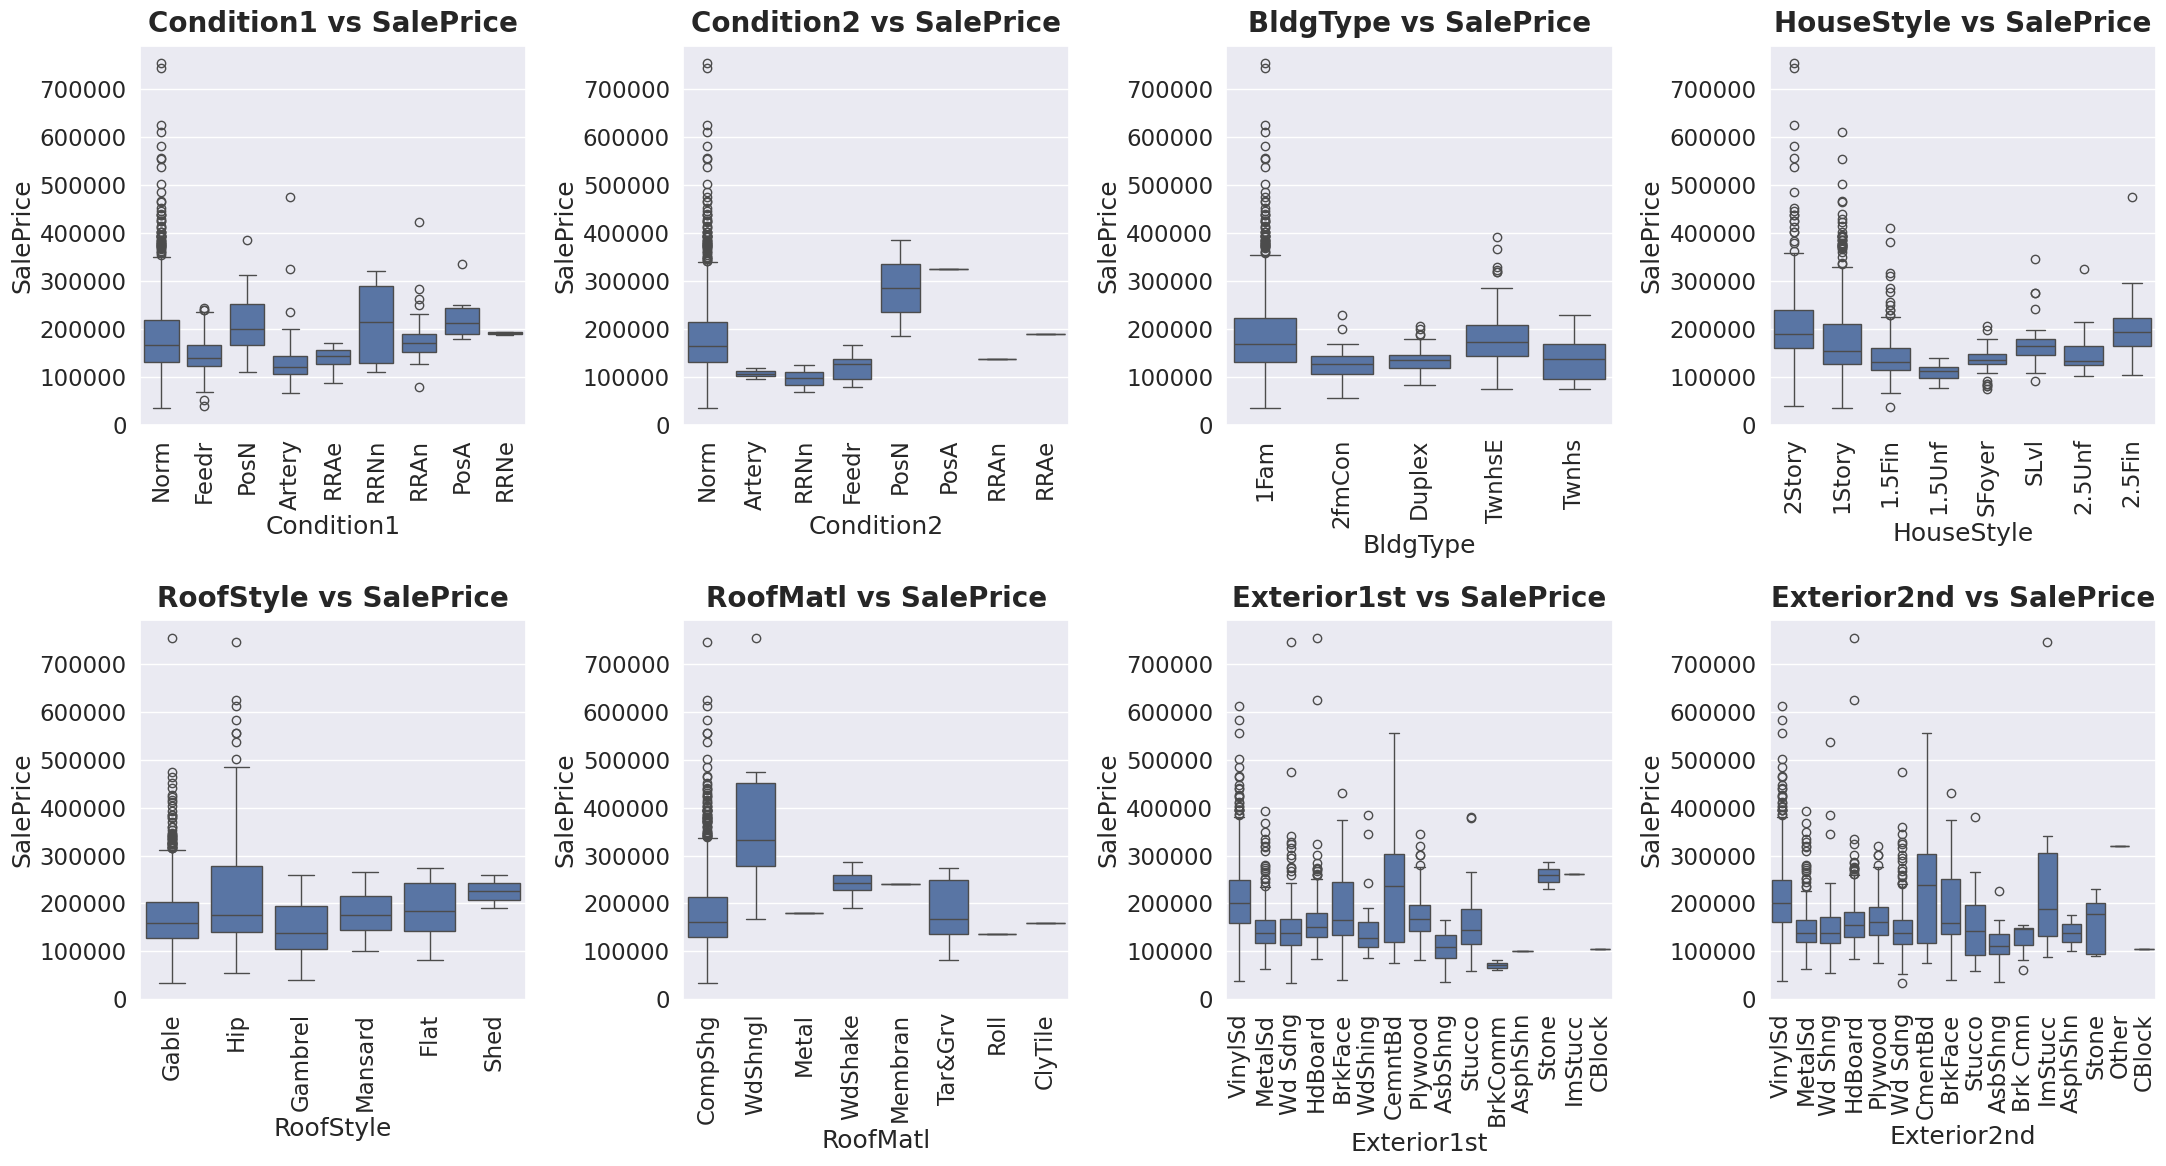

In [260]:
boxplot(cat_cols[8:16])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Features like **`Condition2`** and **`RoofMatl`** are having **very high class imbalance.**
* We can **drop RooftMatl** feature and we will fo **feature engineering** on **condition2** to **reduce the class-imbalance.**

#### Dropping feature with high class-imbalance.

In [261]:
train_df.drop(columns=["RoofMatl"],inplace=True)
test_df.drop(columns=["RoofMatl"],inplace=True)

---

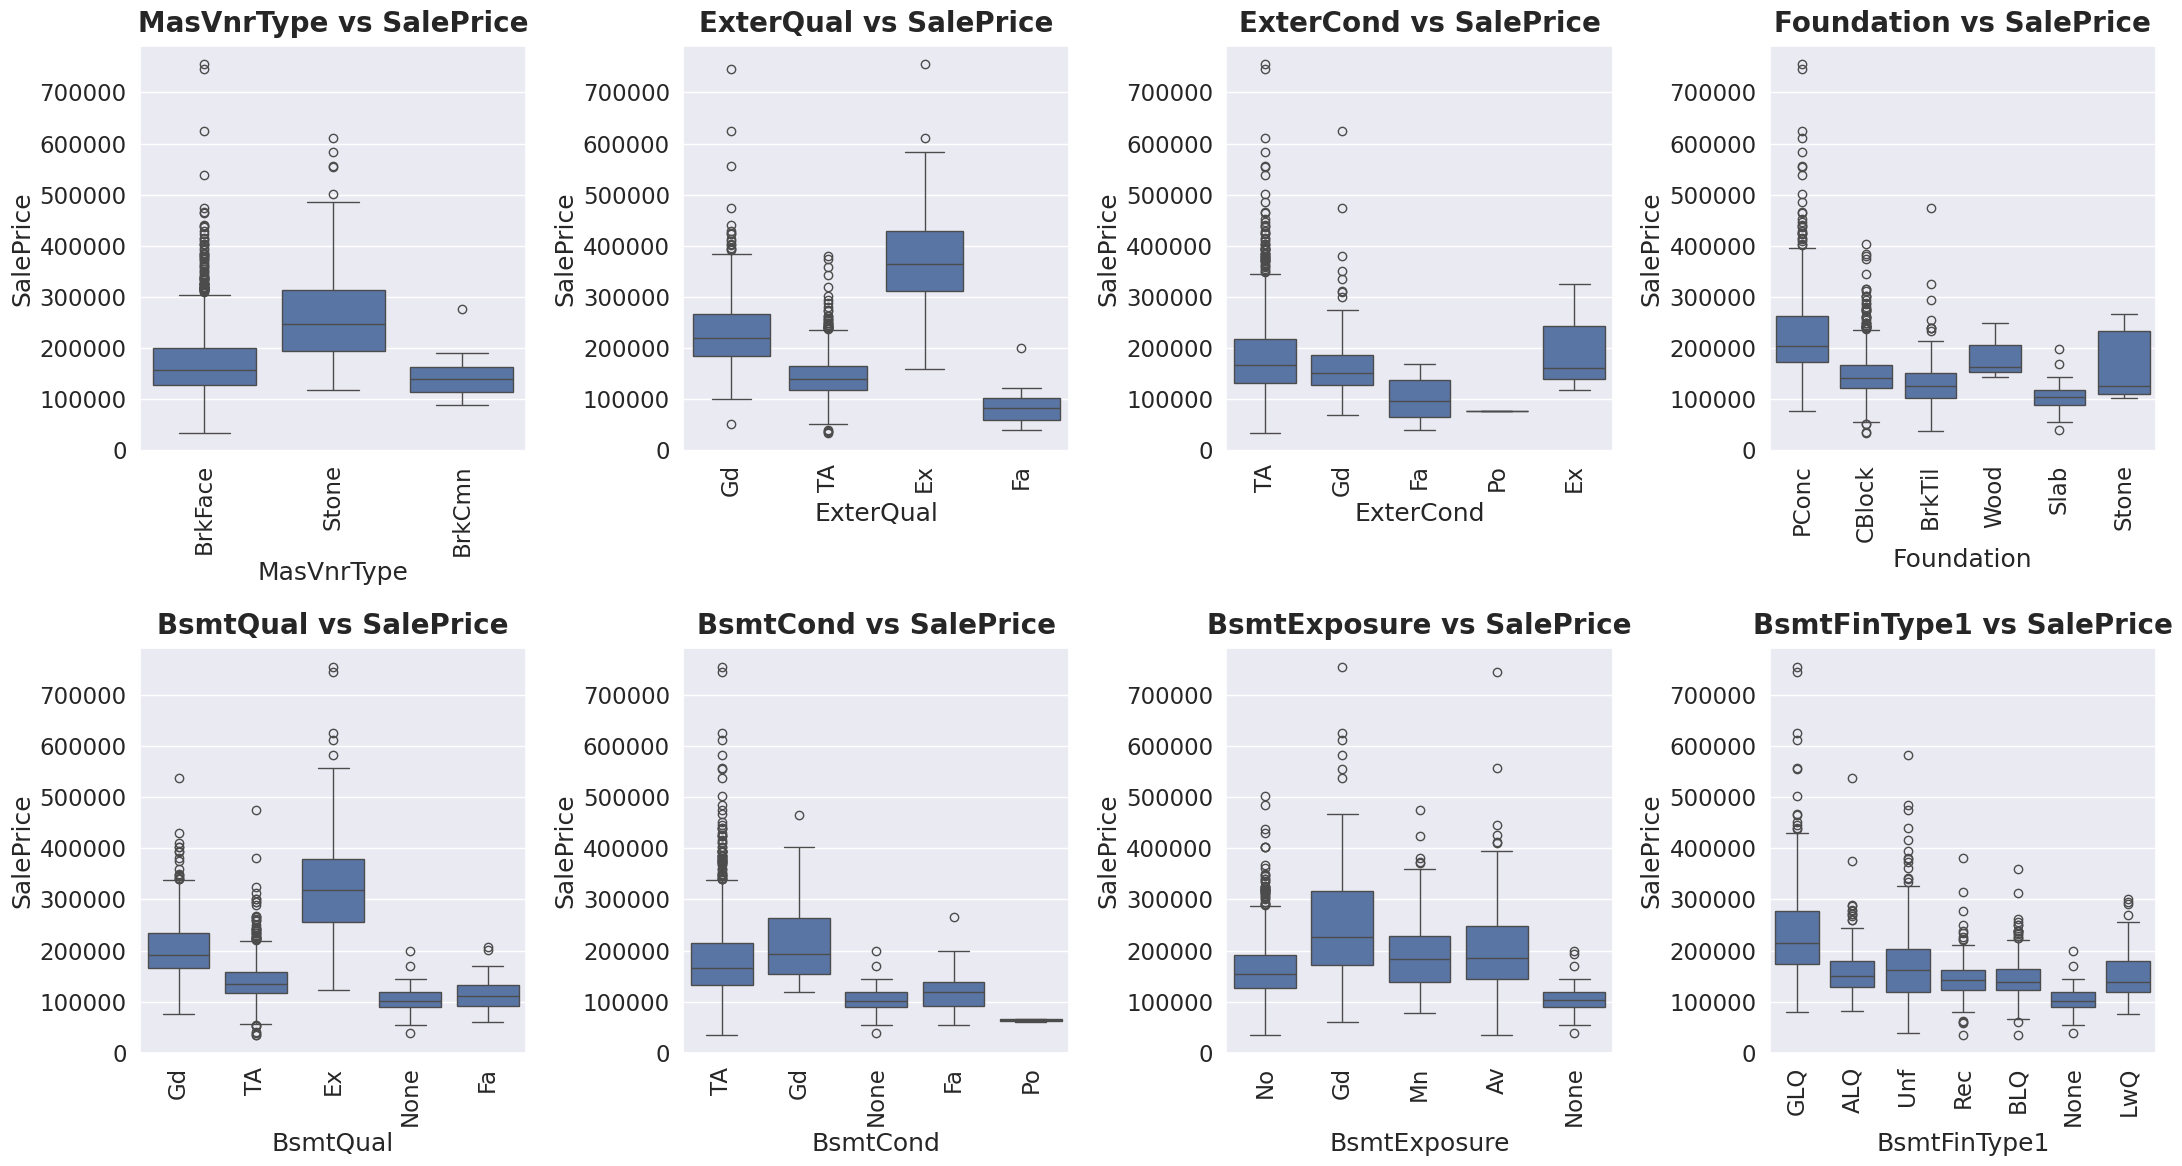

In [262]:
boxplot(cat_cols[16:24])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **All** the features in above visualization **seems very useful** for predicting the price of house.
* The only thing is that we have to perform **enconding** before model training.

---

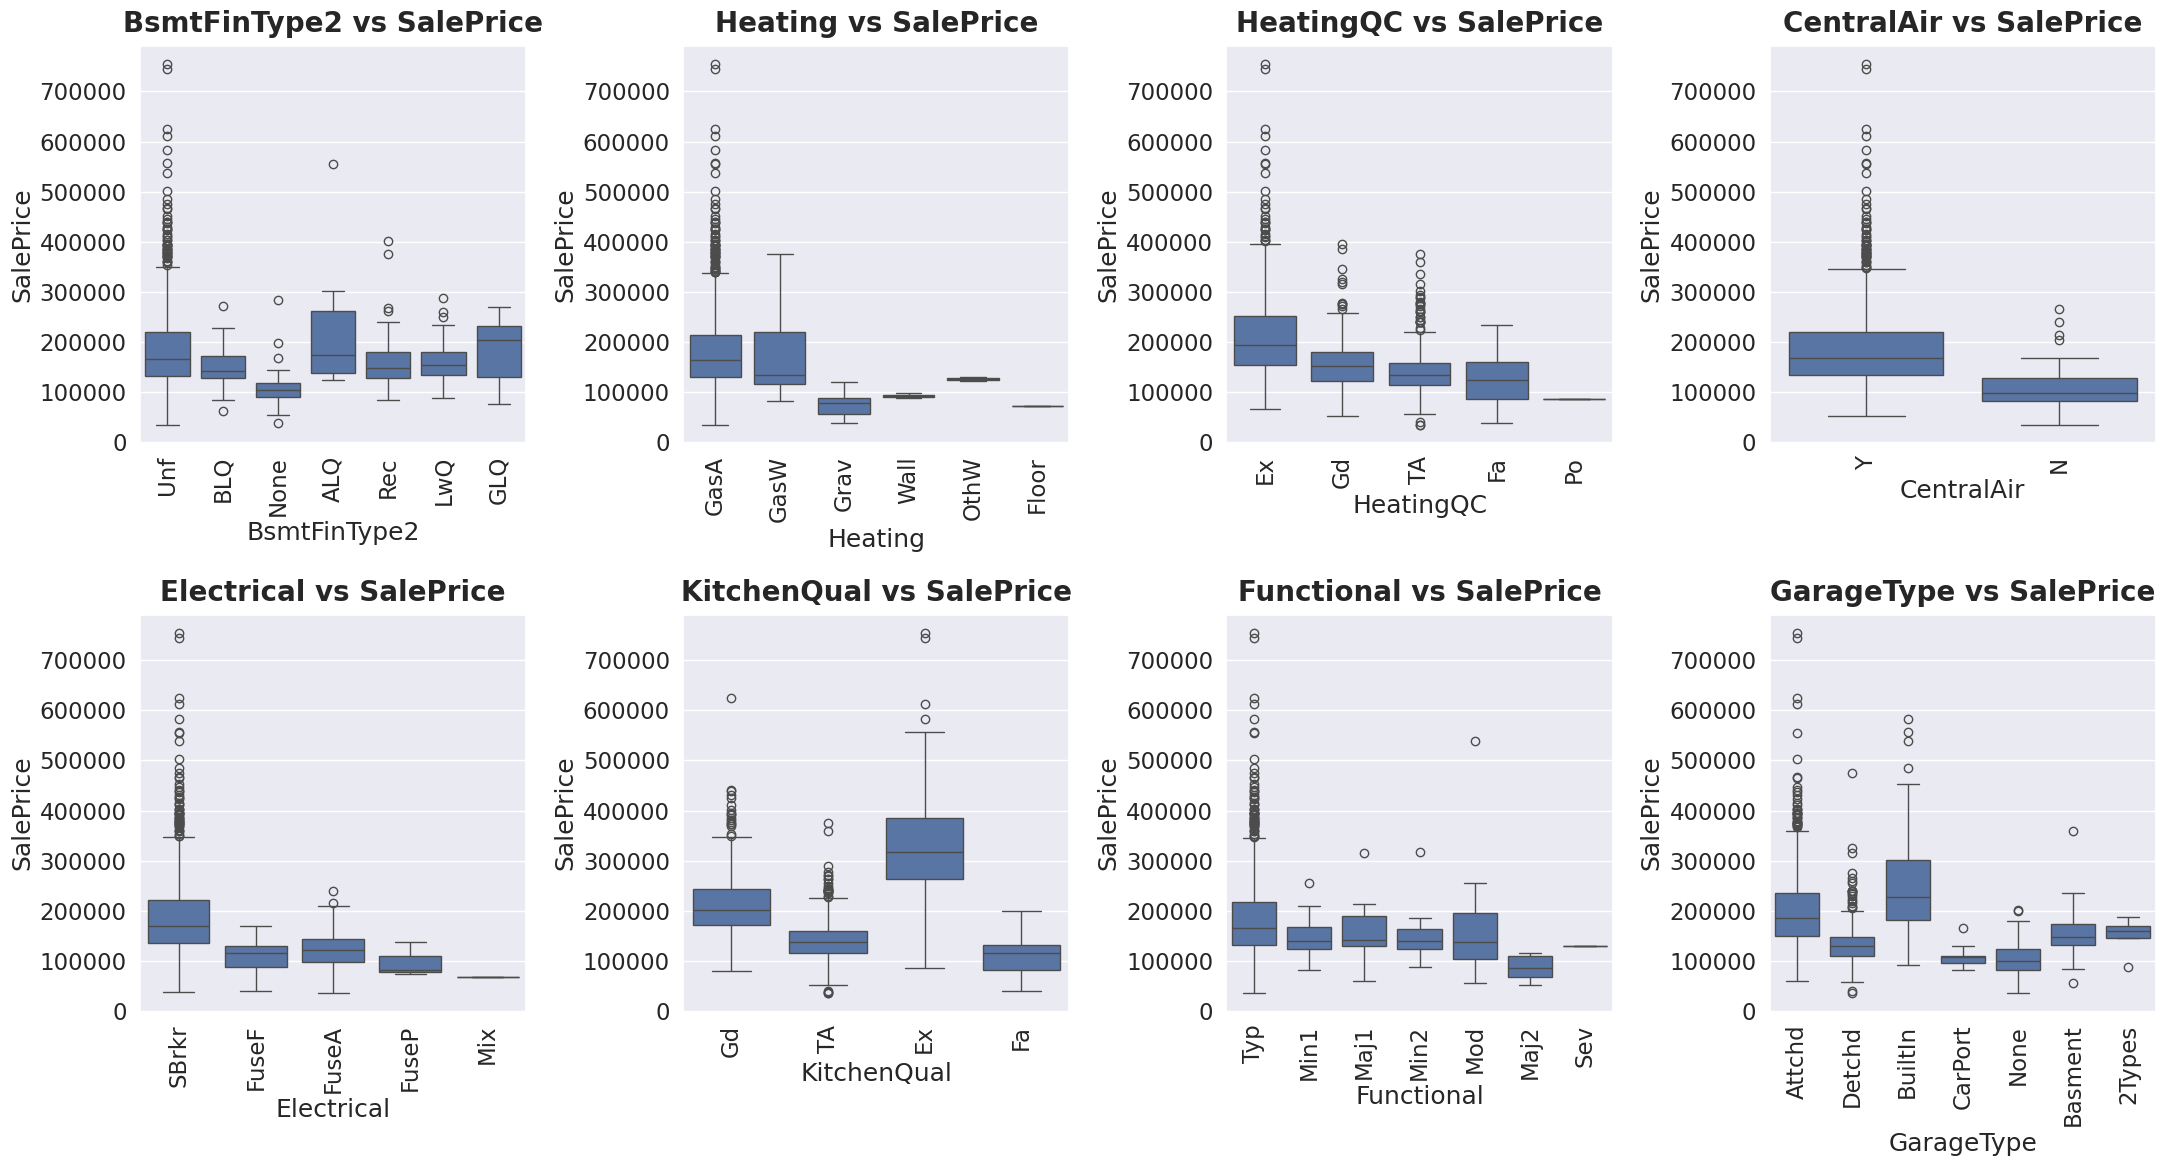

In [263]:
boxplot(cat_cols[24:32])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Features **`Heating`** is having **a class imbalance.** But heating is a **important feature** for people buying house.
* Hence we can perform **feature engineering** to reduce the class-imbalance.
* Rest **all** the other features **seems useful** for house price prediction.

---

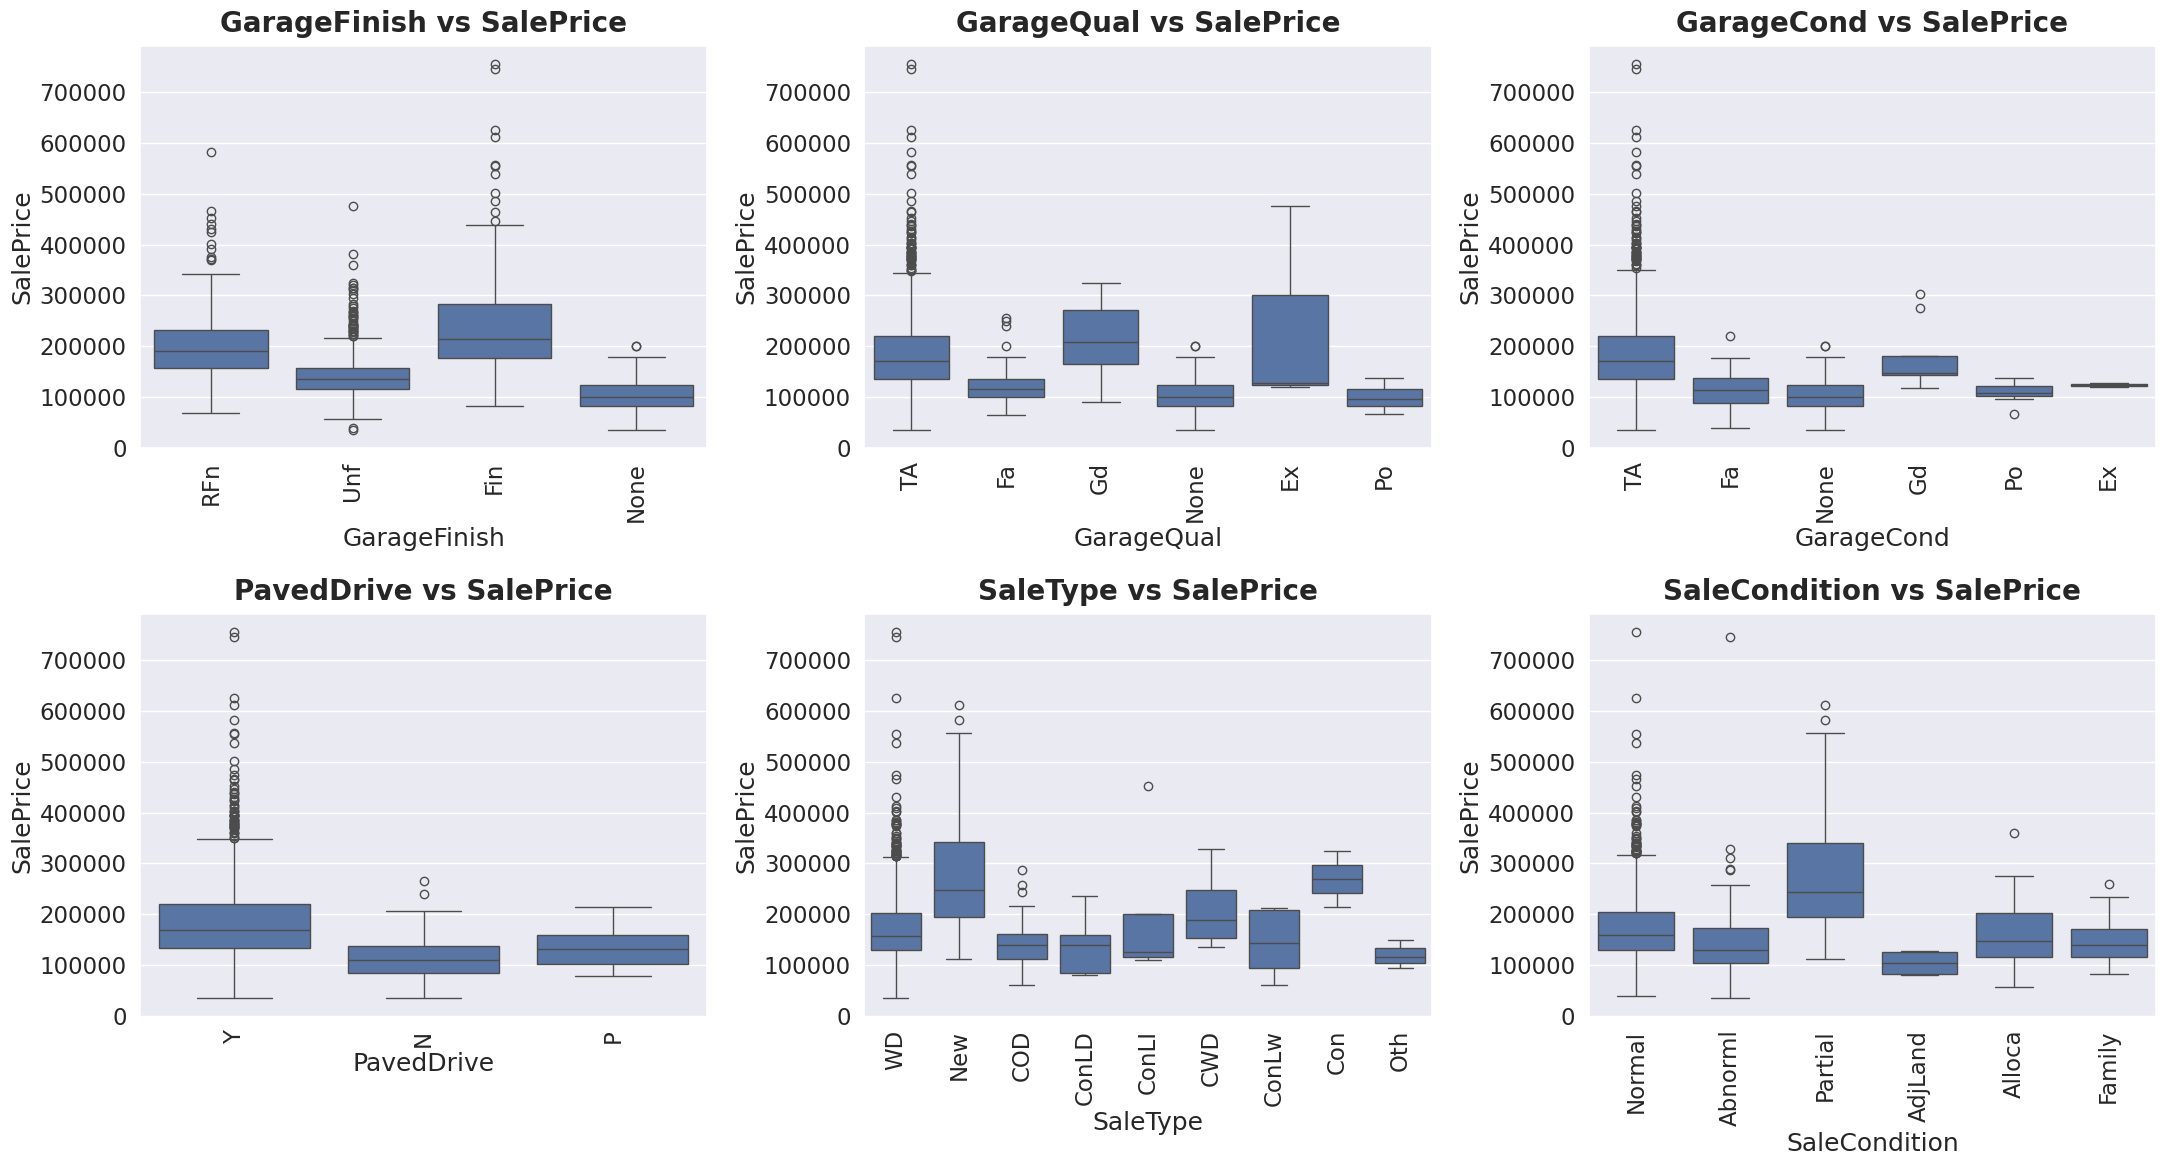

In [264]:
plt.figure(figsize=(22,12))
for index,column in enumerate(cat_cols[32:]):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=column, y="SalePrice", data=train_df)
    plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **All** the features in above visualization **seems very useful** for predicting the price of house.
* The only thing is that we have to perform **enconding** before model training.

---

### 7. Visualizing Discrete Numerical Features w.r.t Average "SalePrice".

In [265]:
dis_cols = ["OverallQual","OverallCond","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
            "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold"]

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

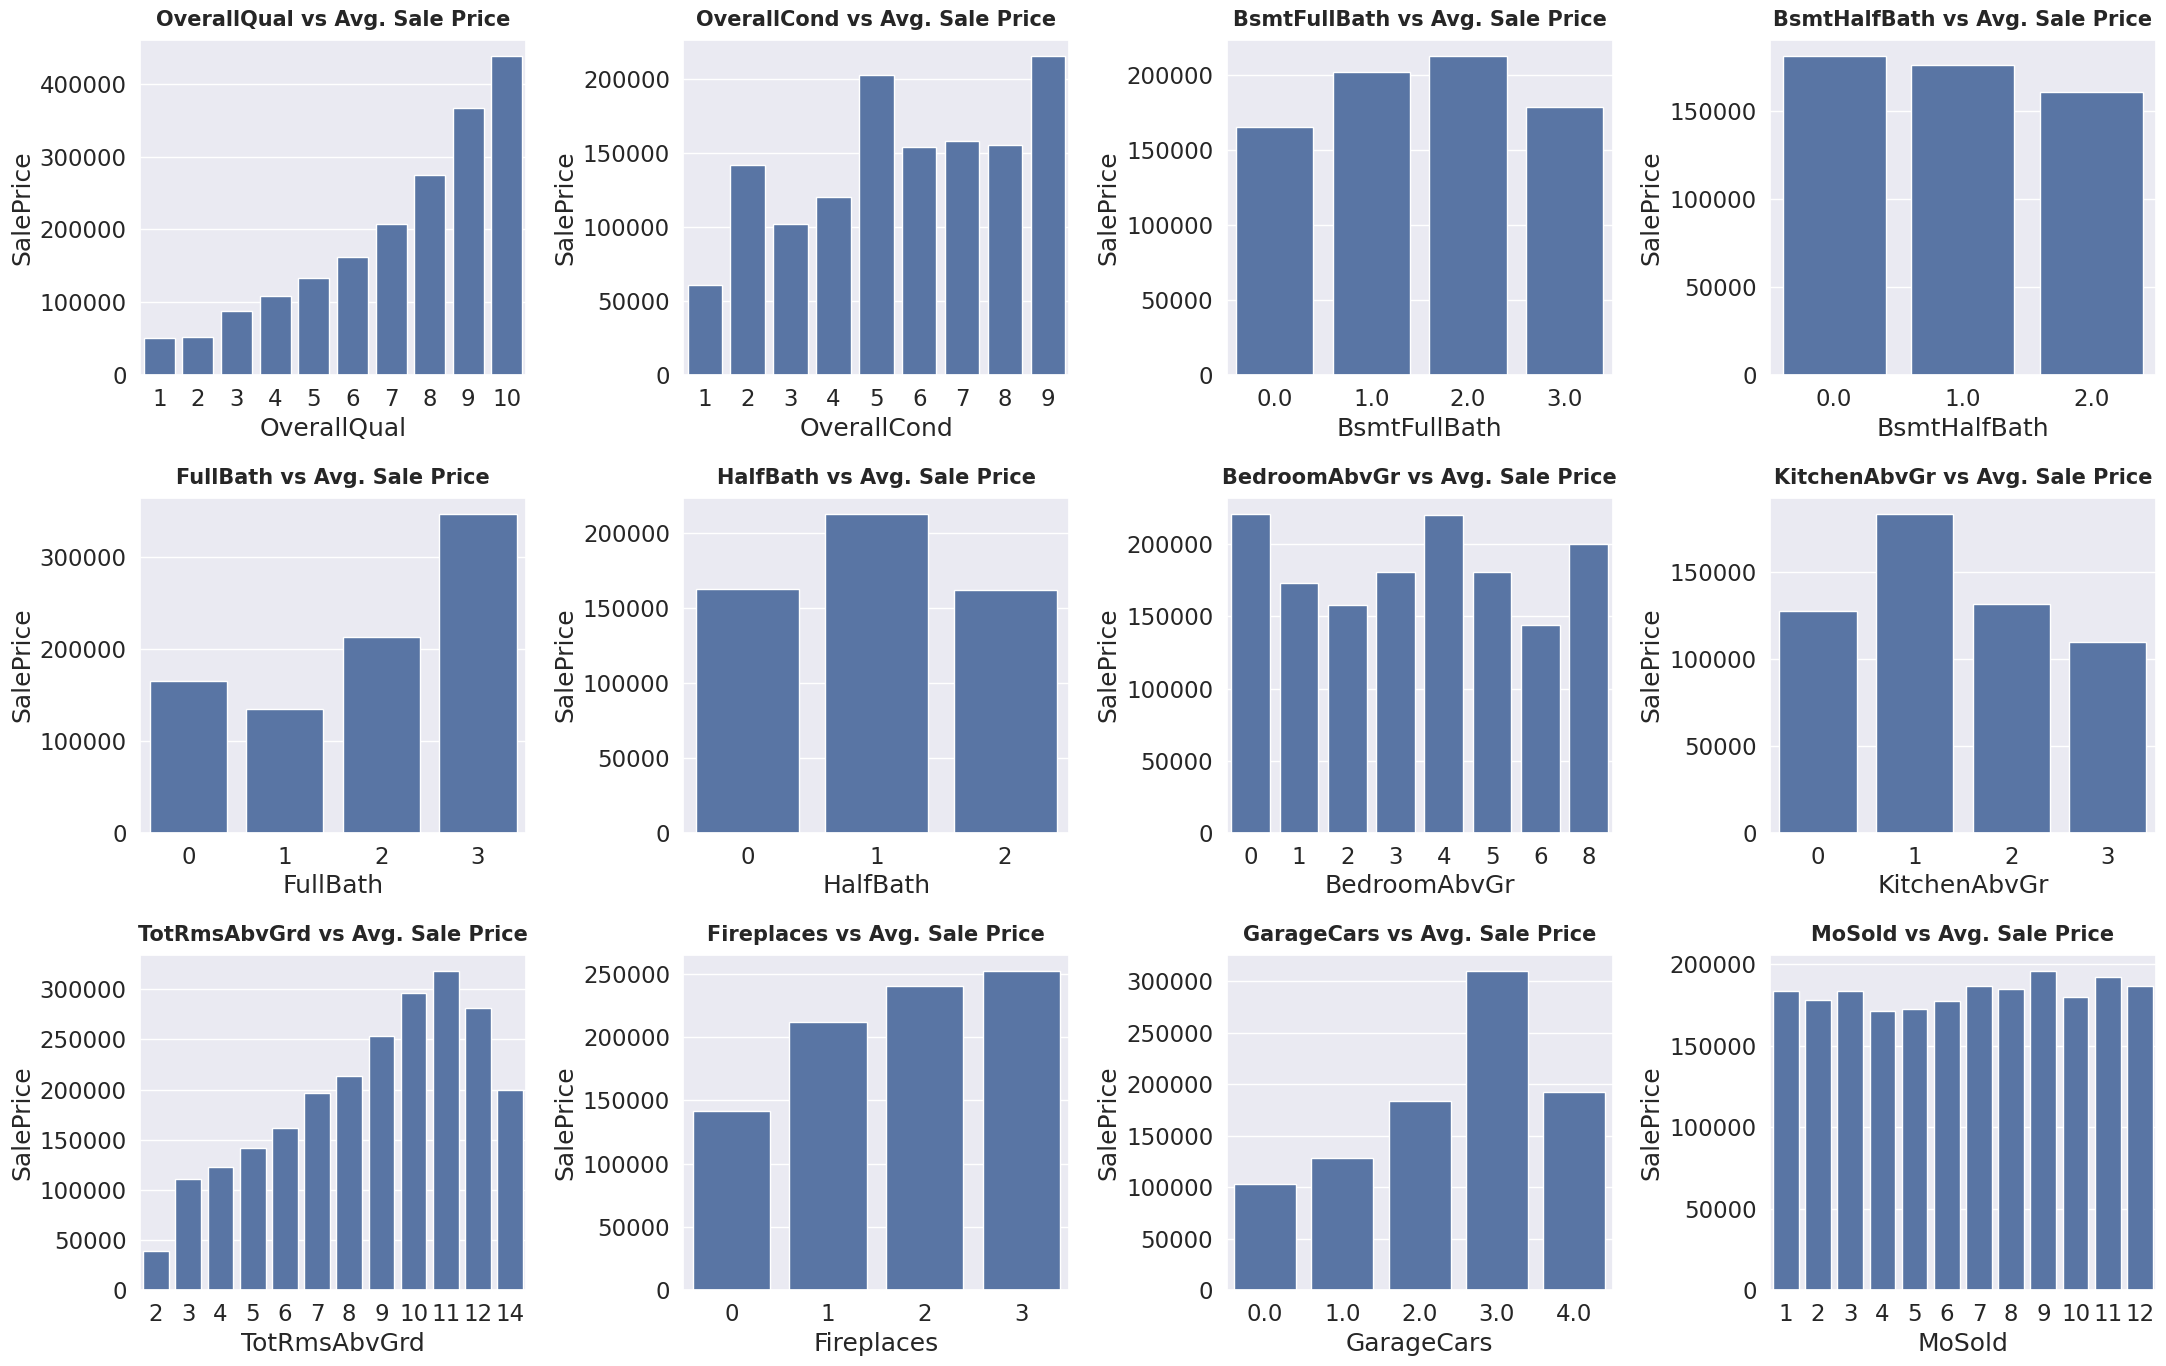

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 14))
for index, column in enumerate(dis_cols):
    data = train_df.groupby(column)["SalePrice"].mean()
    plt.subplot(3, 4, index + 1)
    sns.barplot(x=data.index, y=data)
    plt.title(f"{column} vs Avg. Sale Price", fontweight="black", size=15, pad=10)
    plt.tight_layout()

plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **`OverallQual`**,**`FullBath`**,**`TotRmsAbvGrd`**, **`FirePlaces`** and **`GarageCars`** are having **strong positive relation** with the **SalePrice.**
    
* **`KitchenAbvGr`** is having a **negative correlation** with **SalePrice.**
* So **all these above features** seems **useful** for predicting **Saleprice**.

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🛠️ Feature Engineering 🛠️ </b></div>

## 1. Creating Two New Features "RenovationStatus" and "AgeAtSale" of the House.

* **YearBuilt:** It shows the Original construction date*
* **YrSold:** It shows the original Year Sold (YYYY)
* **YearRemodAdd:** It shows Remodel date (same as construction date if no remodeling or additions).

* **Note:**
    * **First** we can create a **binary feature** that **indicates whether** the **house underwent construction or not.**
    * **Second** we can create a **Discrete numerical feature** that **indicates** the **age of house**.
    * This features can **provide valuable information about the remodeling history** of the property and potentially impact the sale price.

In [268]:
train_df['RenovationStatus'] = (train_df['YearBuilt'] != train_df['YearRemodAdd']).astype(int)
test_df['RenovationStatus']  = (test_df['YearBuilt'] != test_df['YearRemodAdd']).astype(int)

In [269]:
train_df['AgeAtSale'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['AgeAtSale'] = test_df['YrSold'] - test_df['YearBuilt']

#### Dropping the Unwanted Features.

In [270]:
train_df.drop(columns=["YearBuilt","YrSold","YearRemodAdd"],inplace=True)
test_df.drop(columns=["YearBuilt","YrSold","YearRemodAdd"],inplace=True)

### Visualizing the New Features Created.

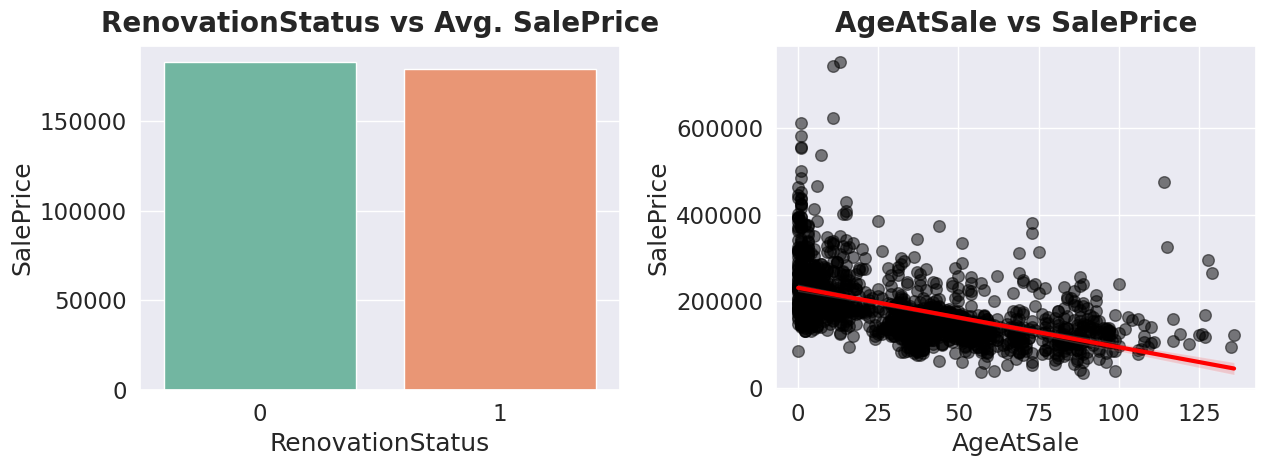

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
data = train_df.groupby("RenovationStatus")["SalePrice"].mean()
sns.barplot(x=data.index, y=data, palette="Set2")
plt.title("RenovationStatus vs Avg. SalePrice", pad=10, size=20, fontweight="black")

plt.subplot(1, 2, 2)
sns.regplot(x=train_df["AgeAtSale"], y=train_df["SalePrice"], color="black", scatter_kws={'s': 70, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 3})
plt.title("AgeAtSale vs SalePrice", pad=10, size=20, fontweight="black")

plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **SalePrice** for both the **RenovationStatus** cateegory is **approxiamately same.**
* There is a **negative correlation** between **AgeAtScale** & **SalePrice.** So this new feature **seems very useful** for model training.

---

## 2. Creating a New Feature using all the columns storing "Bathroom Values."

* **FullBath:** It shows total no. of Full bathrooms above grade.
* **HalfBath:** It shows total no. of Half bathrooms above grade.
* **BsmtFullBath:** It shows total no. of Basement full bathrooms.
* **BsmtHalfBath:** It shows total no. of Basement half bathrooms.

* **Note:**
    * **By adding** all these feature values we can create a new feature **Total bathrooms.**

In [272]:
train_df["Total_Bathrooms"] = (train_df["FullBath"] + (0.5 * train_df["HalfBath"]) +
                               train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"]))

In [273]:
test_df["Total_Bathrooms"] = (test_df["FullBath"] + (0.5 * test_df["HalfBath"]) +
                               test_df["BsmtFullBath"] + (0.5 * test_df["BsmtHalfBath"]))

### Visualiing "Total_Bathrooms" w.r.t  Average "SalePrice".

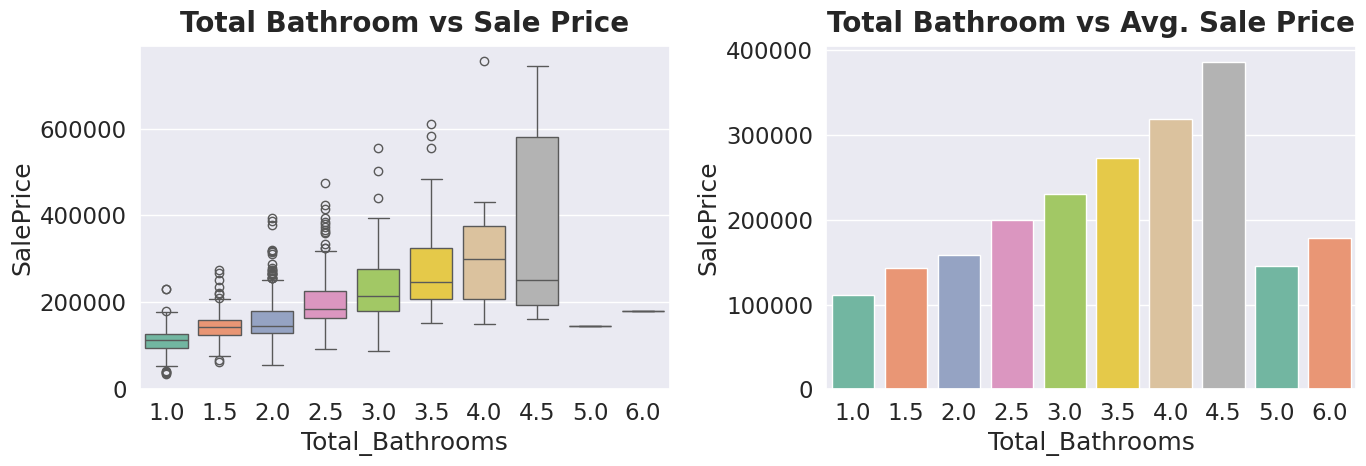

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=train_df["Total_Bathrooms"], y=train_df["SalePrice"], palette="Set2")
plt.title("Total Bathroom vs Sale Price", fontweight="black", size=20, pad=10)

plt.subplot(1, 2, 2)
avg = train_df.groupby("Total_Bathrooms")["SalePrice"].mean()
sns.barplot(x=avg.index, y=avg, palette="Set2")
plt.title("Total Bathroom vs Avg. Sale Price", fontweight="black", size=20, pad=10)
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can clearly observe a **strong positive correlation** between **Total Bathrooms** and **SalePrice**.
* There's a **class-imbalance** because there are only **1 record** for **Total Bathrooms 5 & 6**.
* But still this **feature seems important** very important for **predicting Saleprice.**

---

## 3. Creatng a New Feature using all the columns related to "porch".

* **WoodDeckSF:**  Wood deck area in square feet.
* **OpenPorchSF:** Open porch area in square feet.
* **EnclosedPorch:** Enclosed porch area in square feet.
* **3SsnPorch:** Three season porch area in square feet.
* **ScreenPorch:** Screen porch area in square feet.
* **Note:-**
    * A **porch** is a covered outdoor **living space attached to a house**, typically used for relaxation or socializing.
    * So we can create a new feature **Total_Porch_SF** to indicate the **total porch Sqaure Feet** available.

In [275]:
train_df['Total_Porch_SF'] = (train_df['OpenPorchSF'] + train_df['3SsnPorch'] +train_df['EnclosedPorch'] +
                              train_df['ScreenPorch'] + train_df['WoodDeckSF'])

In [276]:
test_df['Total_Porch_SF'] = (test_df['OpenPorchSF'] + test_df['3SsnPorch'] +test_df['EnclosedPorch'] +
                              test_df['ScreenPorch'] + test_df['WoodDeckSF'])

### Visualizing All These Features.

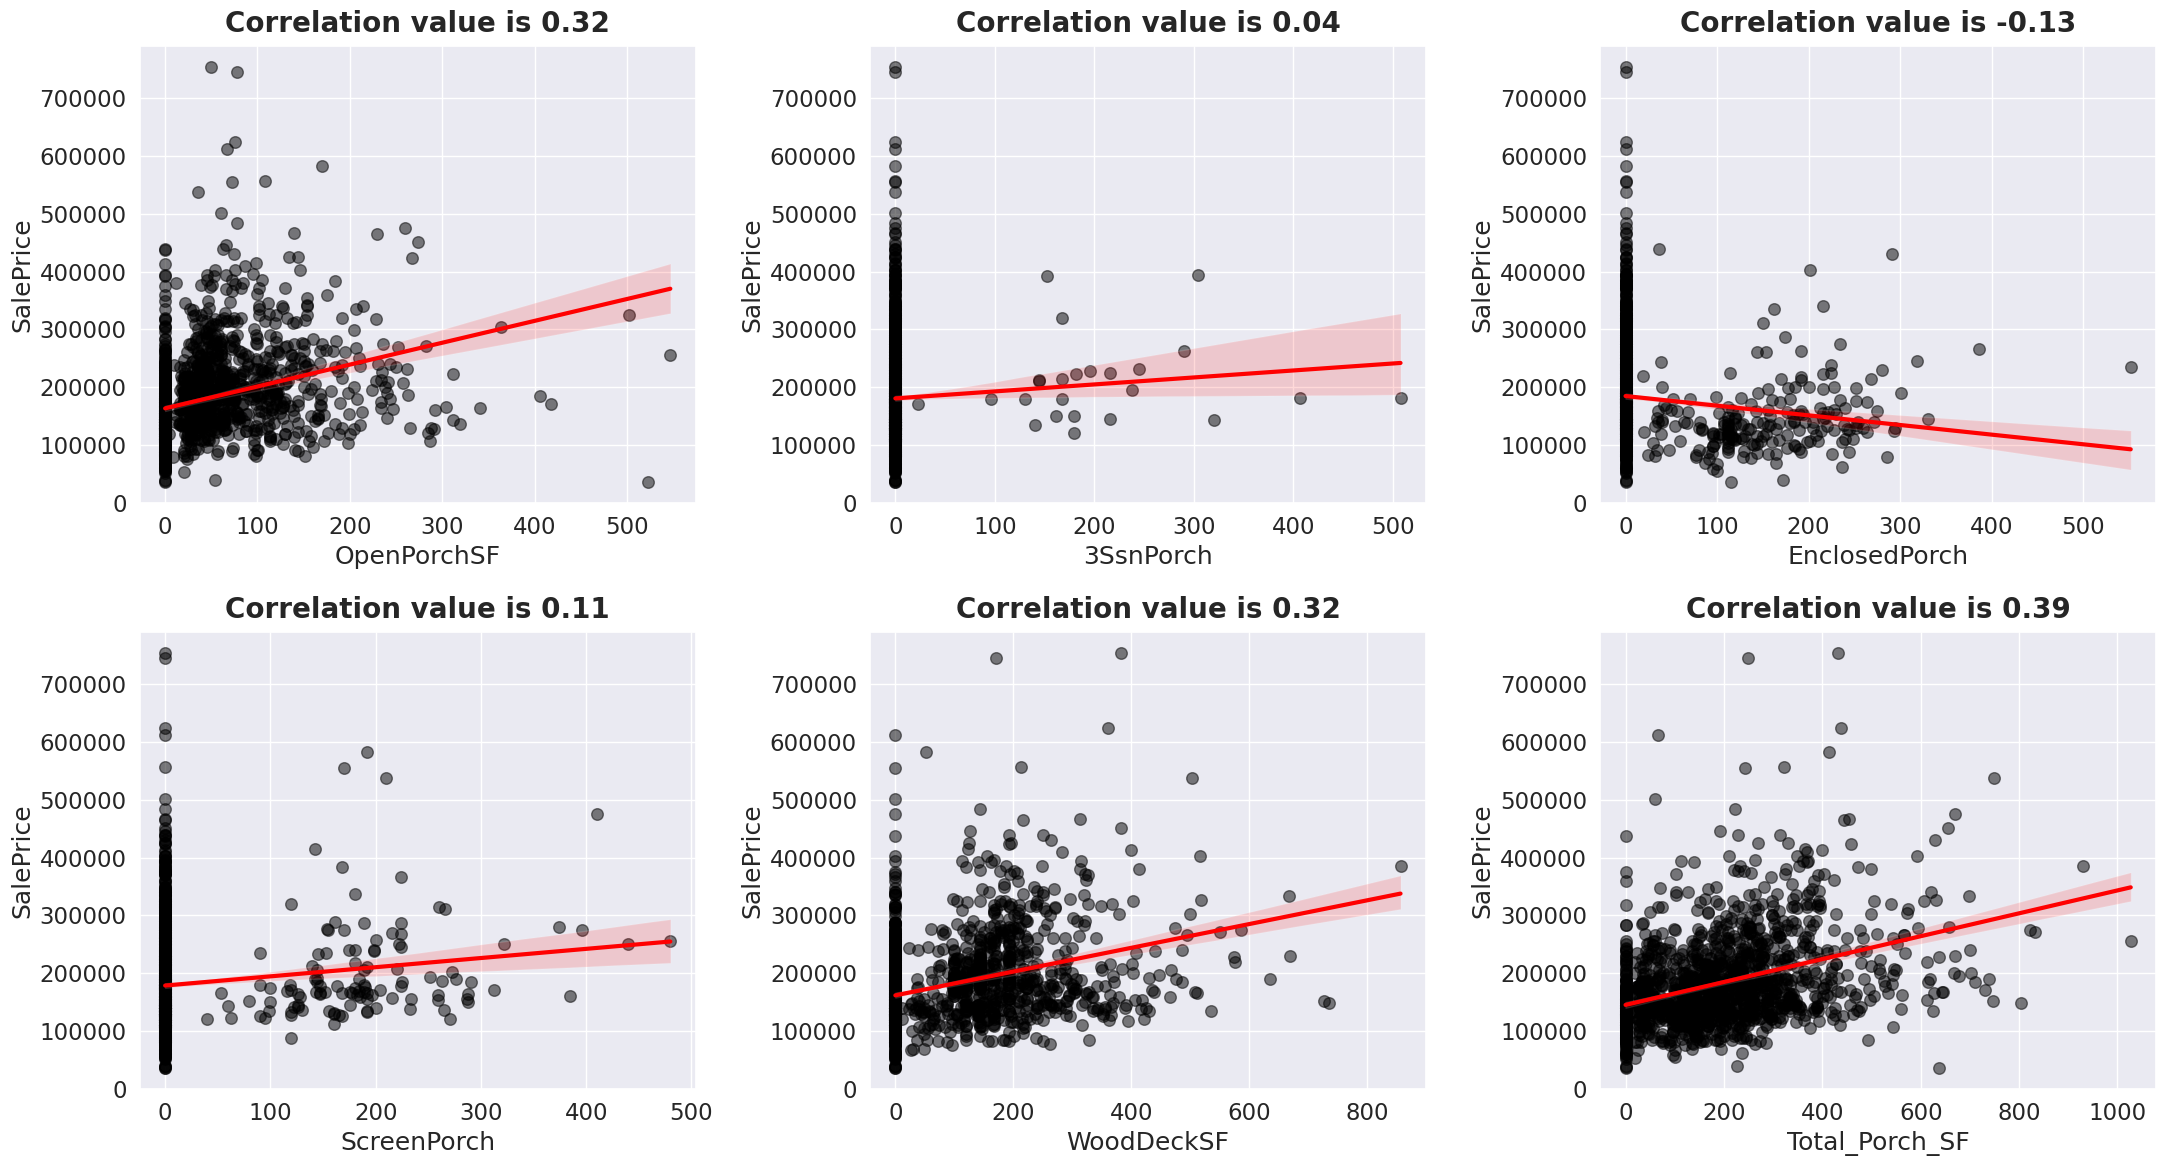

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["OpenPorchSF", "3SsnPorch", "EnclosedPorch", "ScreenPorch", "WoodDeckSF", "Total_Porch_SF"]

plt.figure(figsize=(22, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 3, index + 1)
    sns.regplot(x=train_df[column], y=train_df["SalePrice"], color="black", scatter_kws={'s': 70, 'alpha': 0.5},
                line_kws={'color': 'red', 'lw': 3})
    corr = round(train_df[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
    plt.tight_layout()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Feature like **`OpenPorchSF`**,**`WoodDeckSF`** and **`Total_Porch_SF`** are having **moderate correlation.**So these are **useful features.**
    
* Feature like **`3SsnPorch`**,**`EnclosedPorch`**, and **`ScreenPorch`** are having **weak correlation.**So we can simply **drop this features.**

### Dropping Features with Weak Correlation.

In [278]:
cols = ["3SsnPorch","EnclosedPorch","ScreenPorch"]

train_df.drop(columns=cols,inplace=True)
test_df.drop(columns=cols,inplace=True)

---

## 4. Creating a New Feature Using "Sqaure Footage".

* **BsmtFinSF1:** Type 1 finished square feet.
* **BsmtFinSF2:** Type 2 finished square feet.
* **BsmtUnfSF:** Unfinished square feet of basement area.
* **TotalBsmtSF:** Total square feet of basement area.
* **1stFlrSF:** First Floor square feet.
* **2ndFlrSF:** Second floor square feet.
* **Note:-**
    * By **adding all these square footage** values we can create a new feature **Total_sqr_footage.** indicating the total **square footage of house.**


In [279]:
train_df['Total_sqr_footage']=(train_df['BsmtFinSF1']+train_df['BsmtFinSF2']+train_df['1stFlrSF']+train_df['2ndFlrSF'])
test_df['Total_sqr_footage'] =(test_df['BsmtFinSF1']+test_df['BsmtFinSF2']+test_df['1stFlrSF']+test_df['2ndFlrSF'])

### Visualizing All These Features.

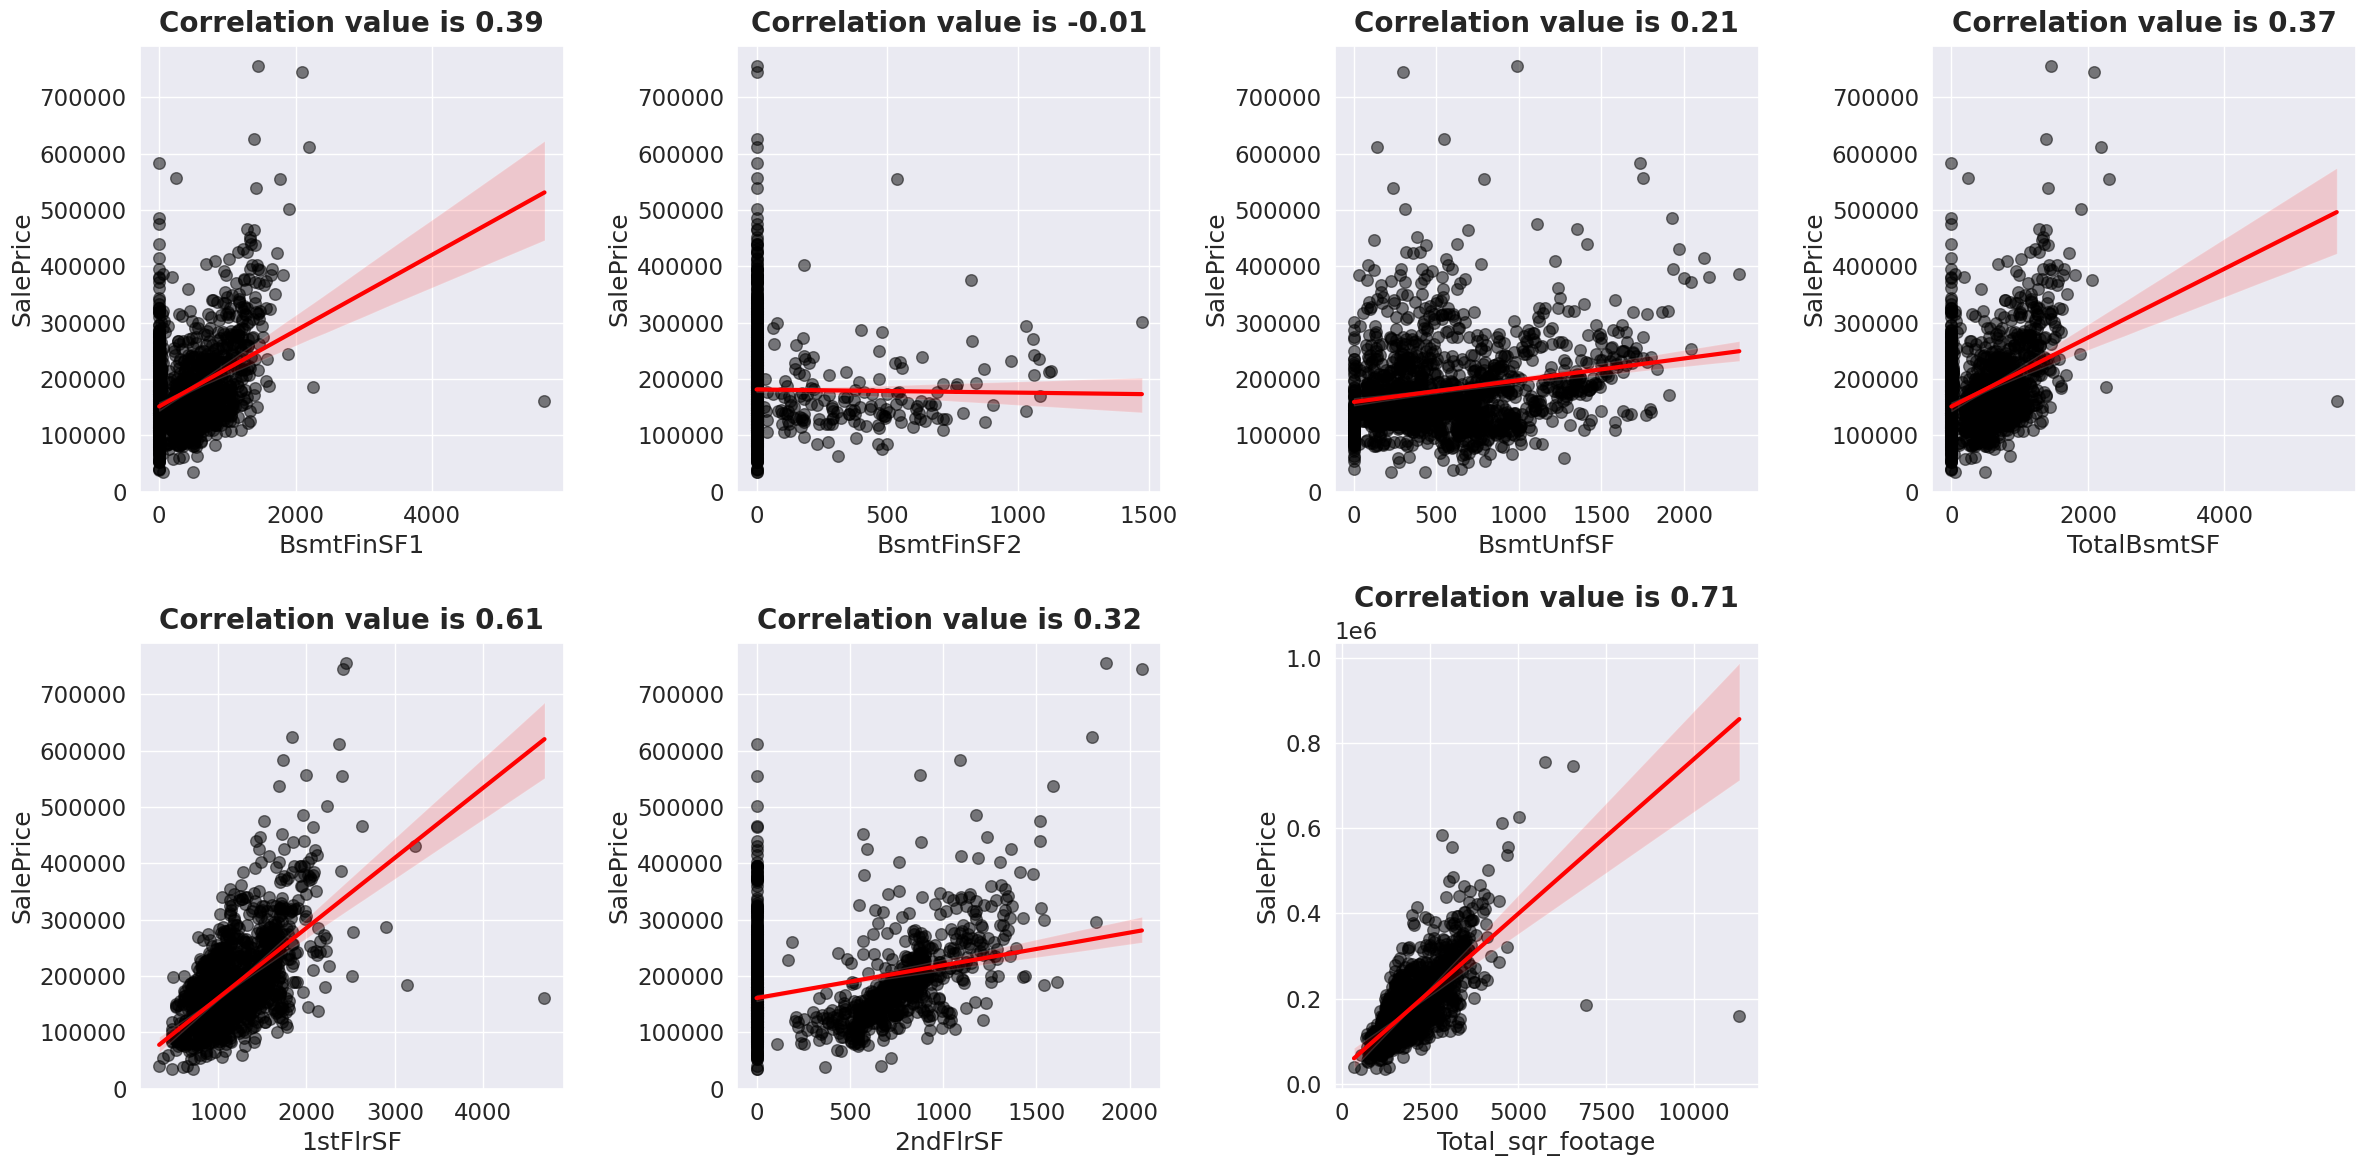

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "Total_sqr_footage"]

plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=train_df[column], y=train_df["SalePrice"], color="black", scatter_kws={'s': 70, 'alpha': 0.5},
                line_kws={'color': 'red', 'lw': 3})
    corr = round(train_df[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
    plt.tight_layout()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The new feature **`Total_sqr_footage`** and **`1stFlrSF`** are having **very high correlation** with the target varibale.

* Features like **`BsmtFinSF1`**,**`TotalBsmtSF`**, and **`2ndFlrSF`** are having **modearte correlation** with the target variable.
    
* Features like **`BsmtFinSF2`** and **`BsmtUnfSF`** are having very **weak correaltion** witht the target variable. So we can simply **drop those featues.**

### Dropping Features with weak correaltion.

In [281]:
cols = ["BsmtFinSF2","BsmtUnfSF"]
train_df.drop(columns=cols,inplace=True)
test_df.drop(columns=cols,inplace=True)

---

## 5. Creatining a New Feature using "Condition1" & "Condition2".

* **Condition1:** Proximity to various conditions.
* **Condition2:** Proximity to various conditions (if more than one is present).
* **Note:-**
    * In the **EDA** section we found that **Condition2 feature** wah having **class-imbalace.**
    * Instead of **keeping two different conditions** we can **combine both** condition1 and condition2.
    * **After Combining** we can create a new **boolean feature ProximityStatus** indicating **No if its Norm** or else **Yes if there's any proximity.**

In [282]:
def condition(df):
    df["Condition2"] = df["Condition2"].replace({"Norm":""}) #Norm means normal which indicates there's no second condition
    combined_condition = []
    for val1,val2 in zip(df["Condition1"],df["Condition2"]):
        if val2 == "":
            combined_condition.append(val1)
        elif val1==val2:
            combined_condition.append(val1)
        else:
            combined_condition.append(val1+val2)

    df["Combined_Condition"] = combined_condition
    df["ProximityStatus"] = (df["Combined_Condition"] == "Norm").astype(int)

In [283]:
condition(train_df)
condition(test_df)

### Dropping Columns Which are not Required Anymore.

In [284]:
train_df.drop(columns=["Condition1","Condition2","Combined_Condition"],inplace=True)
test_df.drop(columns=["Condition1","Condition2","Combined_Condition"],inplace=True)

---

## 6. Creating New Feature using "Heating" Feature.

* **Heating:** Type of heating.
* **HeatingQC:** Heating quality and condition.
* **Note:**
    * While performing **EDA** we found **huge class-imbalance** in **Heating** Feature.
    * To **reduce class-imbalance** we can create a new feature by **concatenating both the features.**

In [285]:
train_df["HeatingQuality"] = train_df["Heating"] + "-" + train_df["HeatingQC"]
test_df["HeatingQuality"] = test_df["Heating"] + "-" + test_df["HeatingQC"]

#### Dropping Features which are not required anymore.

In [286]:
train_df.drop(columns=["Heating","HeatingQC"],inplace=True)
test_df.drop(columns=["Heating","HeatingQC"],inplace=True)

In [287]:
test_df["HeatingQuality"].replace({"Wall-Po":"Wall-TA"},inplace=True)

---

## 7. Creating Some New Boolean Features.

In [288]:
def boolean_feature(df):
    df["Has2ndFloor"] = (df['2ndFlrSF'] != 0).astype(int)
    df["HasGarage"]  = (df["GarageArea"] !=0).astype(int)
    df["HasBsmt"]    = (df["TotalBsmtSF"]!=0).astype(int)
    df["HasFirePlace"] = (df["Fireplaces"]!=0).astype(int)

In [289]:
boolean_feature(train_df)
boolean_feature(test_df)

### Visualizing All These New Boolean Features.

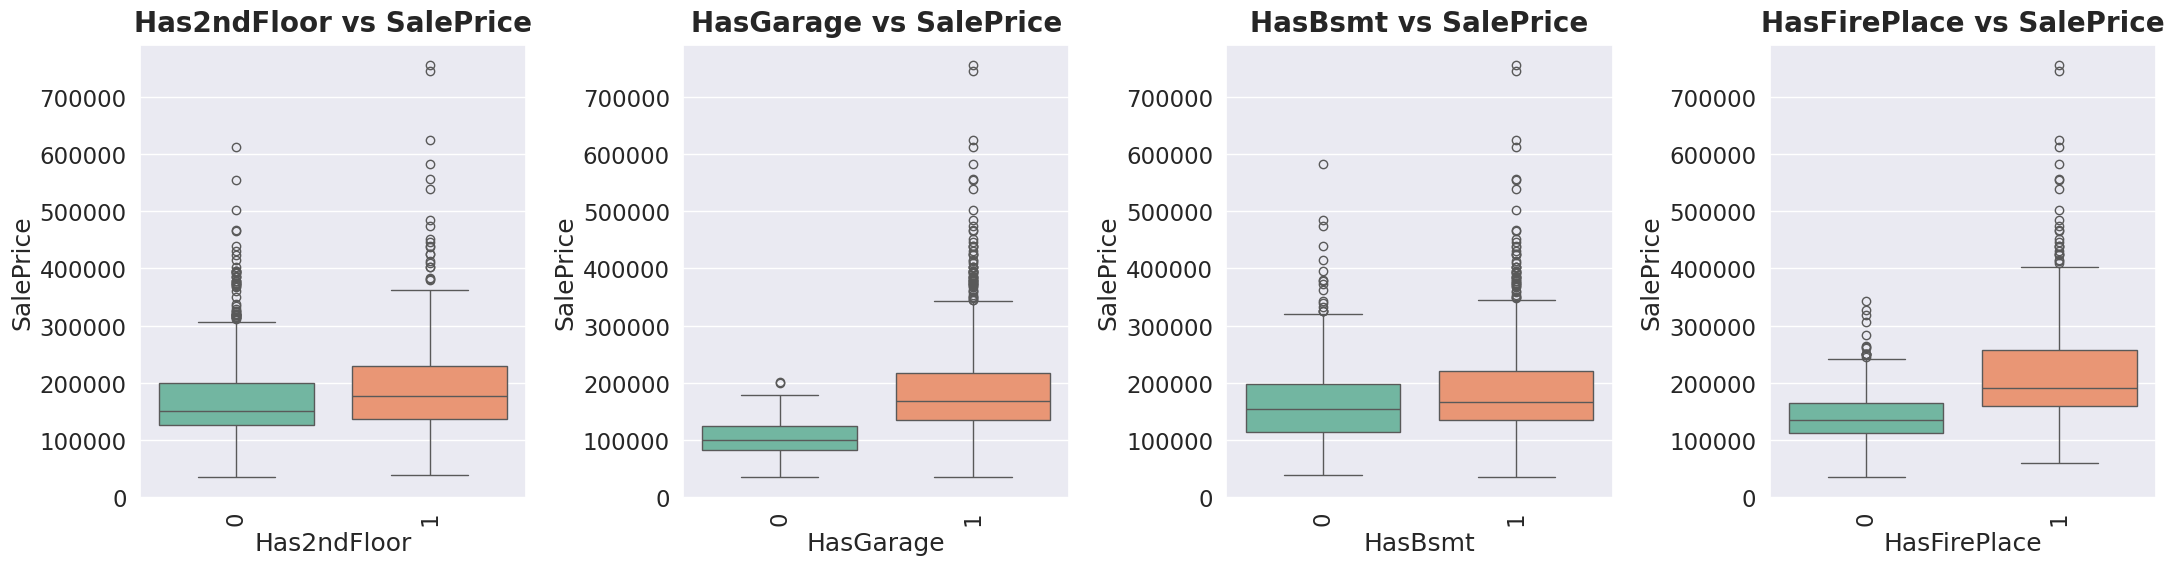

In [290]:
plt.figure(figsize=(22,6))
for index,column in enumerate(["Has2ndFloor","HasGarage","HasBsmt","HasFirePlace"]):
    plt.subplot(1,4,index+1)
    sns.boxplot(x=column, y="SalePrice", data=train_df, palette="Set2")
    plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All these features **seems very useful** for **model training.**

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⚙️ Data Preprocessing - Part 2 ⚙️</b></div>

### 1. Performing Log Transformation on Target variable.

In [291]:
z = train_df["SalePrice"]

train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

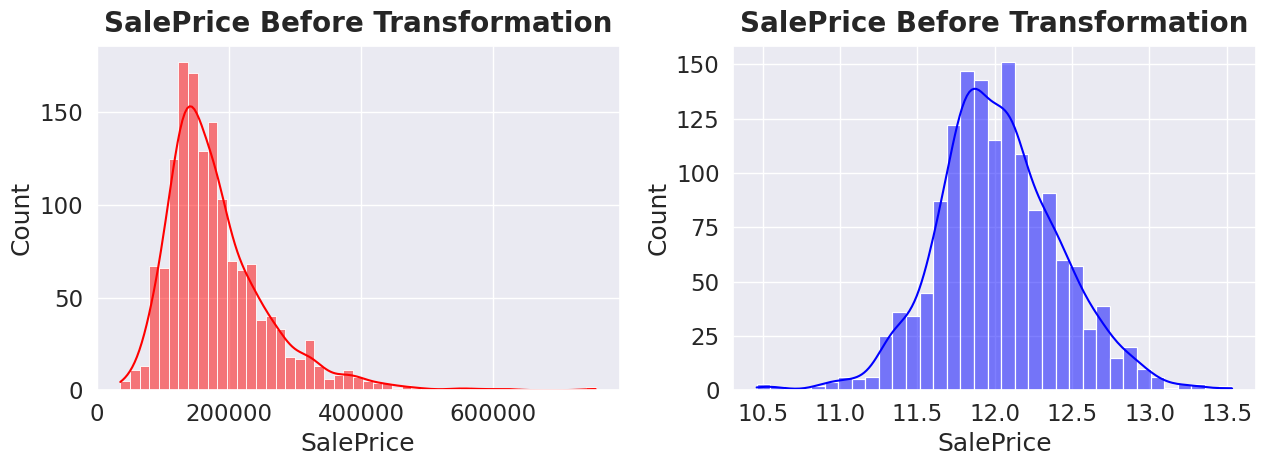

In [292]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(z,color="red",kde=True)
plt.title("SalePrice Before Transformation",size=20,pad=10,fontweight="black")

plt.subplot(1,2,2)
sns.histplot(train_df["SalePrice"],color="blue",kde=True)
plt.title("SalePrice Before Transformation",size=20,pad=10,fontweight="black")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can clearly onserve that **SalePrice** has been transformed to a **normal distribution**.
    
* This will help model in **`Homoscedasticity`**,**`Interpretability`** and **`Model Performance`**.

---

### 2. Applying Box-Cox Transformation on Continous Numerical Features to Reduce Skewness.

In [293]:
con_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF",
            "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","PoolArea","MiscVal","AgeAtSale","Total_Porch_SF",
            "Total_sqr_footage"]

In [294]:
train_df[con_cols].skew().sort_values().to_frame().rename(columns={0:"Skewness"}).T

GarageArea  AgeAtSale  2ndFlrSF  Total_Porch_SF  GrLivArea  \
Skewness    0.179981    0.60903   0.81303        1.102313    1.36656   

          1stFlrSF  TotalBsmtSF  WoodDeckSF  BsmtFinSF1  Total_sqr_footage  \
Skewness  1.376757     1.405961    1.541376    1.685503           2.163968   

          LotFrontage  OpenPorchSF  MasVnrArea  LowQualFinSF    LotArea  \
Skewness     2.213556     2.364342    2.677616      9.011341  12.207688   

           PoolArea    MiscVal  
Skewness  14.828374  24.476794

In [295]:
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

for feature in con_cols:
    train_df[feature] = boxcox1p(train_df[feature], boxcox_normmax(train_df[feature] + 1, method='mle'))
    test_df[feature] = boxcox1p(test_df[feature] + 1, boxcox_normmax(train_df[feature] + 1, method='mle'))


In [296]:
train_df[con_cols].skew().sort_values().to_frame().rename(columns={0:"Skewness"})

Skewness
TotalBsmtSF        -0.458660
BsmtFinSF1         -0.411401
Total_Porch_SF     -0.382788
GarageArea         -0.328235
AgeAtSale          -0.226952
OpenPorchSF        -0.014772
1stFlrSF           -0.001106
GrLivArea           0.000171
Total_sqr_footage   0.003521
LotArea             0.026569
WoodDeckSF          0.132275
LotFrontage         0.170595
2ndFlrSF            0.280724
MasVnrArea          0.426258
MiscVal             5.016528
LowQualFinSF        7.299413
PoolArea           14.352680

---

### 3. Dropping Features with High Skewness Values.

In [297]:
cols = ["MiscVal","LowQualFinSF","PoolArea"]

train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

---

### 4. Performing Target Encoding on Categorical Features with High Cardinality.

In [298]:
cols = ["Neighborhood","Exterior1st","Exterior2nd","HeatingQuality"]
for column in cols:
    data = train_df.groupby(column)["SalePrice"].mean()
    for value in data.index:
        train_df[column] = train_df[column].replace({value:data[value]})
        test_df[column] = test_df[column].replace({value:data[value]})

---

### 5. Performing Label Encoding on Other Features.

In [299]:
cols = ["HouseStyle","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","Electrical","KitchenQual",
        "GarageQual","GarageCond"]

In [300]:
encoder = LabelEncoder()

train_df[cols] = train_df[cols].apply(encoder.fit_transform)
test_df[cols] = test_df[cols].apply(encoder.fit_transform)

---

### 6. Applying One-Hot Encoding on Nominal Categorical Columns.

In [301]:
cols = train_df.select_dtypes(include="object").columns

In [302]:
train_df = pd.get_dummies(train_df, columns=cols)
test_df = pd.get_dummies(test_df,columns=cols)

In [303]:
train_df.shape

(1460, 143)

In [304]:
test_df.shape

(1459, 142)

---

### 7. Segregating Features and Labels For Model Training.

In [305]:
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]

---

### 8. Feature Scaling using RobustScaler.

In [306]:
scaler = RobustScaler()

In [307]:
X_scaled = scaler.fit_transform(X)
test_df = scaler.fit_transform(test_df)

---

### 9. Splitting Data For Model Training & Testing.

In [308]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=0)

In [309]:
print("Dimension of x_train:=>",x_train.shape)
print("Dimension of x_test:=>",x_test.shape)
print("Dimension of y_train:=>",y_train.shape)
print("Dimension of y_test:=>",y_test.shape)

Dimension of x_train:=> (1168, 142)
Dimension of x_test:=> (292, 142)
Dimension of y_train:=> (1168,)
Dimension of y_test:=> (292,)


---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🎯 Model Creation & Evaluation 🎯</b></div>

## Creating  a Function to Train Model using Different Regression Algorithms.

In [310]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [311]:
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2)

    print(f"R2 Score of the {model} model is=>",r2)
    print(f"Adjusted R2 Score of the {model} model is=>",adjusted_r2)
    print()
    print(f"MAE of {model} model is=>",mae)
    print(f"MSE of {model} model is=>",mse)
    print(f"RMSE of {model} model is=>",rmse)


    # Scatter plot.
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)

    # Residual plot.
    plt.subplot(1,2,2)
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:black; font-size:200%; text-align:center;padding: 0px;">1. Creating Linear Regression Model.

R2 Score of the LinearRegression() model is=> 0.8419403017827383
Adjusted R2 Score of the LinearRegression() model is=> 0.6913062269716566

MAE of LinearRegression() model is=> 0.09322144636133188
MSE of LinearRegression() model is=> 0.02392993277043987
RMSE of LinearRegression() model is=> 0.1546930275430663


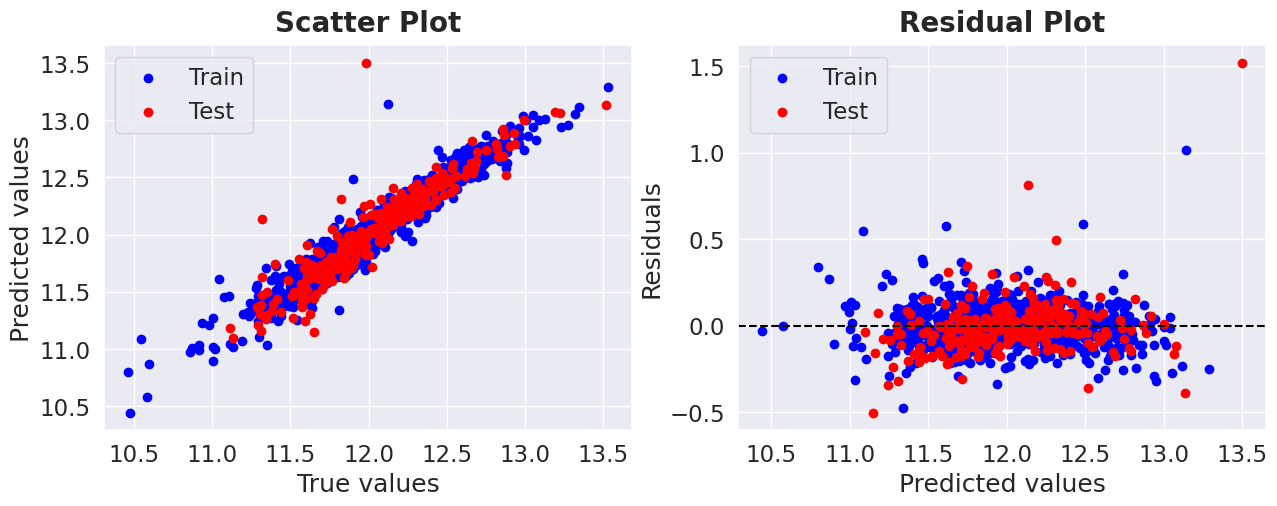

In [312]:
model_evaluation(LinearRegression())

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 1px; color:black; font-size:200%; text-align:center;padding: 0px;">2. Creating Support vector Regressor Model.

R2 Score of the SVR() model is=> 0.8725961809040761
Adjusted R2 Score of the SVR() model is=> 0.7511777761280949

MAE of SVR() model is=> 0.09610750231102802
MSE of SVR() model is=> 0.019288691931273007
RMSE of SVR() model is=> 0.1388837353014132


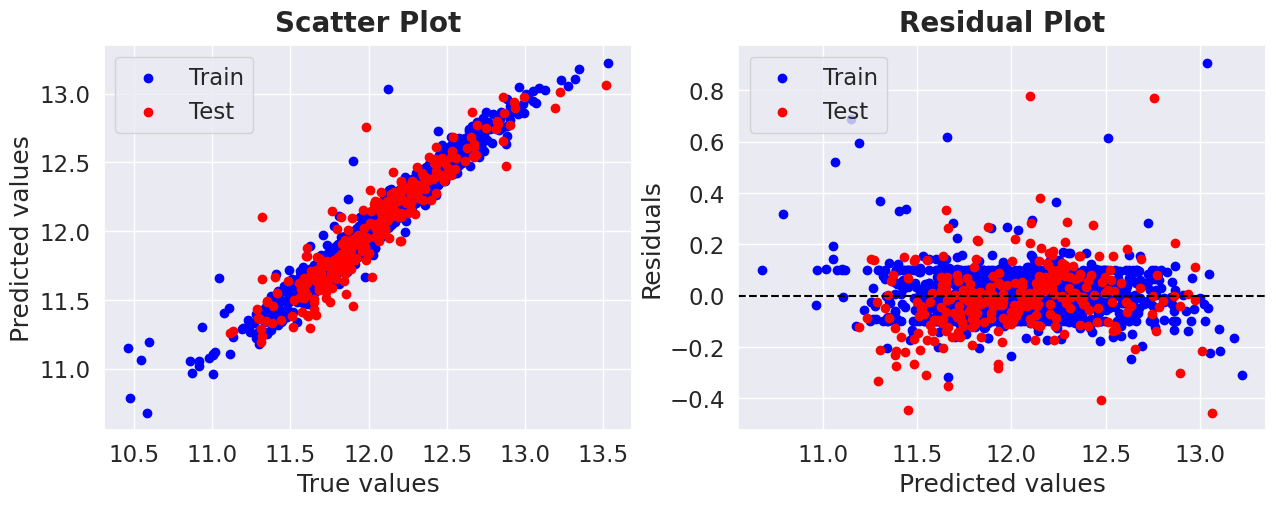

In [313]:
model_evaluation(SVR())

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:black; font-size:200%; text-align:center;padding: 0px;">3. Creating Random Forest Regressor Model.

R2 Score of the RandomForestRegressor() model is=> 0.8649257769864098
Adjusted R2 Score of the RandomForestRegressor() model is=> 0.73619732283923

MAE of RandomForestRegressor() model is=> 0.09863375584010238
MSE of RandomForestRegressor() model is=> 0.020449976257019158
RMSE of RandomForestRegressor() model is=> 0.14300341344534107


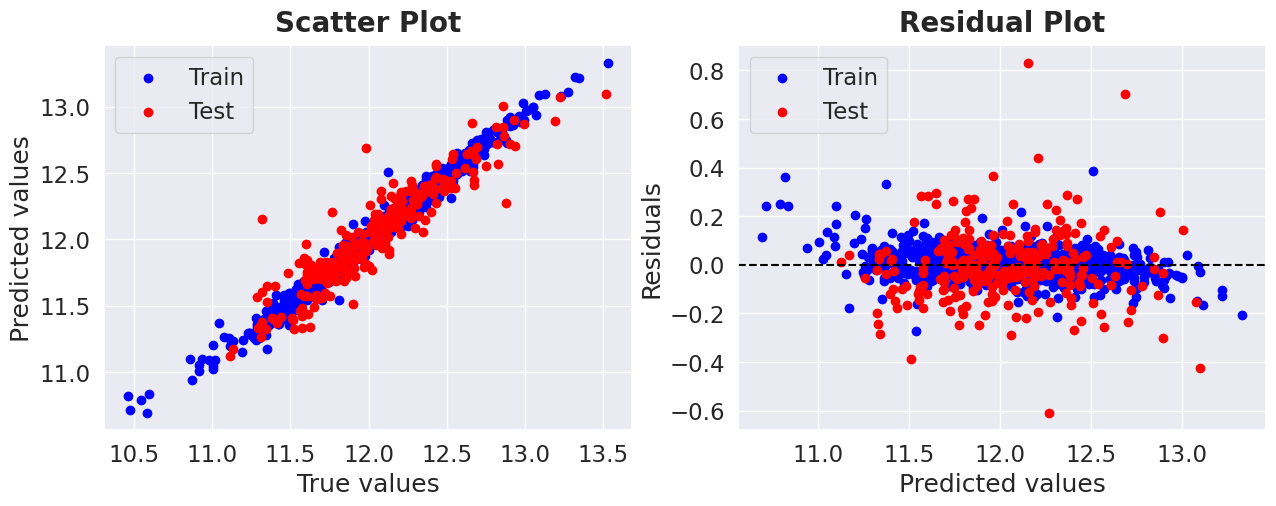

In [314]:
model_evaluation(RandomForestRegressor())

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:black; font-size:200%; text-align:center;padding: 0px;">4. Creating AdaBoost Regressor Model.

R2 Score of the AdaBoostRegressor() model is=> 0.8018342943946606
Adjusted R2 Score of the AdaBoostRegressor() model is=> 0.6129783870392365

MAE of AdaBoostRegressor() model is=> 0.13015218937756629
MSE of AdaBoostRegressor() model is=> 0.030001904761479976
RMSE of AdaBoostRegressor() model is=> 0.17321057924237762


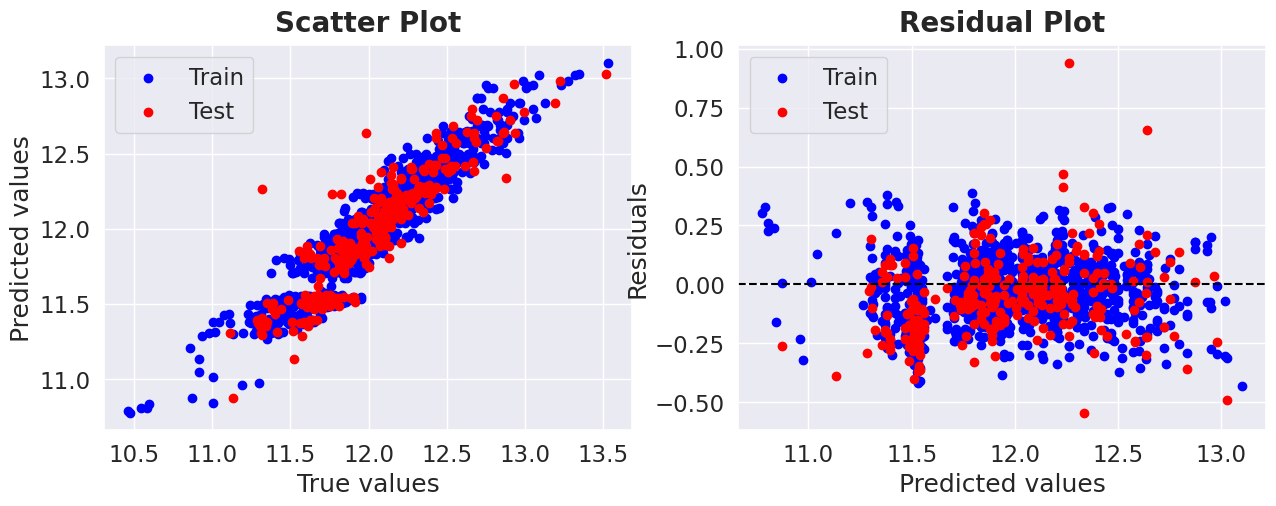

In [315]:
model_evaluation(AdaBoostRegressor())

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:black; font-size:200%; text-align:center;padding: 0px;">5. Creating Gradient Boosting Regressor Model.

R2 Score of the GradientBoostingRegressor() model is=> 0.8797722197418596
Adjusted R2 Score of the GradientBoostingRegressor() model is=> 0.7651927244622896

MAE of GradientBoostingRegressor() model is=> 0.09673279595130686
MSE of GradientBoostingRegressor() model is=> 0.018202253522981326
RMSE of GradientBoostingRegressor() model is=> 0.13491572748564687


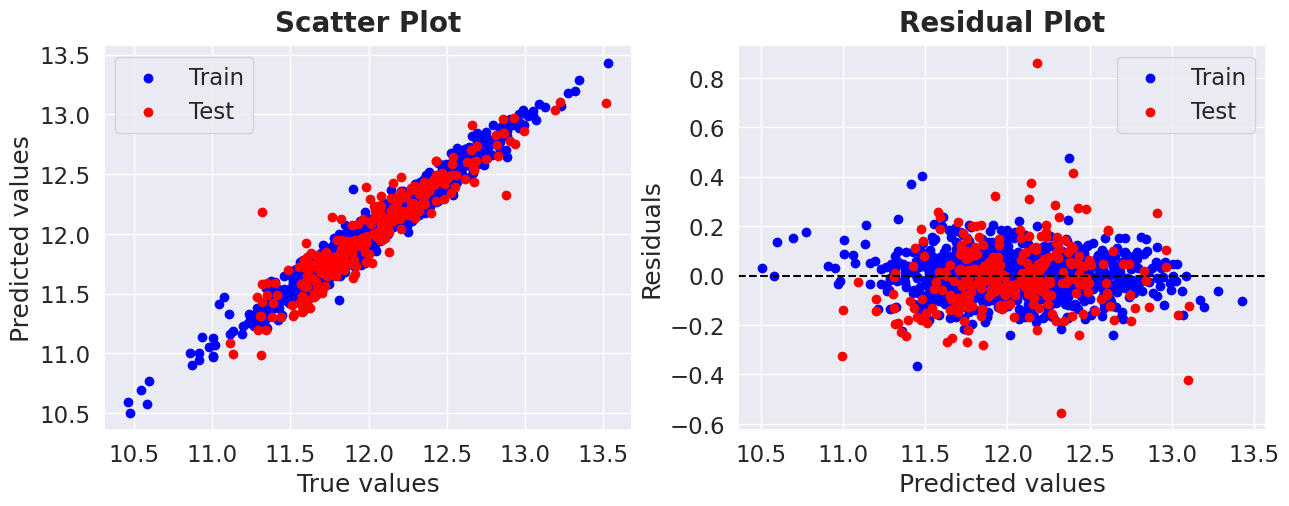

In [316]:
model_evaluation(GradientBoostingRegressor())

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:black; font-size:200%; text-align:center;padding: 0px;">6. Creating LGBM Regressor Model.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3197
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 111
[LightGBM] [Info] Start training from score 12.023362
R2 Score of the LGBMRegressor() model is=> 0.8753346796347578
Adjusted R2 Score of the LGBMRegressor() model is=> 0.7565261192866746

MAE of LGBMRegressor() model is=> 0.09749507537001191
MSE of LGBMRegressor() model is=> 0.018874088517143558
RMSE of LGBMRegressor() model is=> 0.13738299937453527


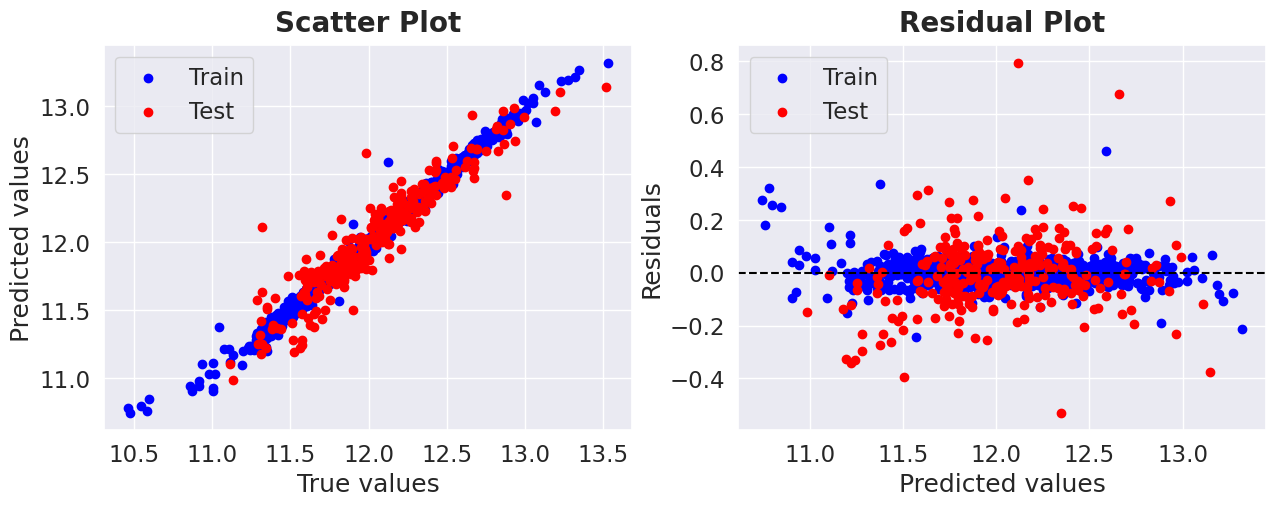

In [317]:
model_evaluation(LGBMRegressor())

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:black; font-size:200%; text-align:center;padding: 0px;">7. Creating XGBRegressor Model.

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model is=> 0.8685593508945209
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stoppin

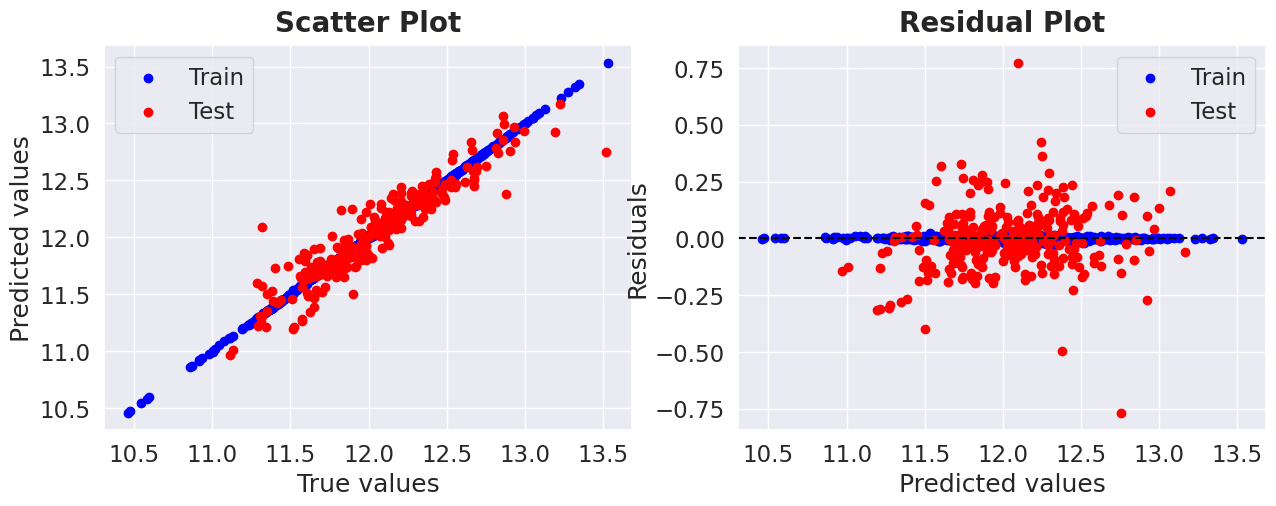

In [318]:
model_evaluation(XGBRegressor())

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:black; font-size:200%; text-align:center;padding: 0px;">8. Creating CatBoost Regressor Model.

R2 Score of the <catboost.core.CatBoostRegressor object at 0x7ec72ebf37c0> model is=> 0.8973543812468325
Adjusted R2 Score of the <catboost.core.CatBoostRegressor object at 0x7ec72ebf37c0> model is=> 0.7995310398847535

MAE of <catboost.core.CatBoostRegressor object at 0x7ec72ebf37c0> model is=> 0.0845595559902747
MSE of <catboost.core.CatBoostRegressor object at 0x7ec72ebf37c0> model is=> 0.015540348258587565
RMSE of <catboost.core.CatBoostRegressor object at 0x7ec72ebf37c0> model is=> 0.12466093316908695


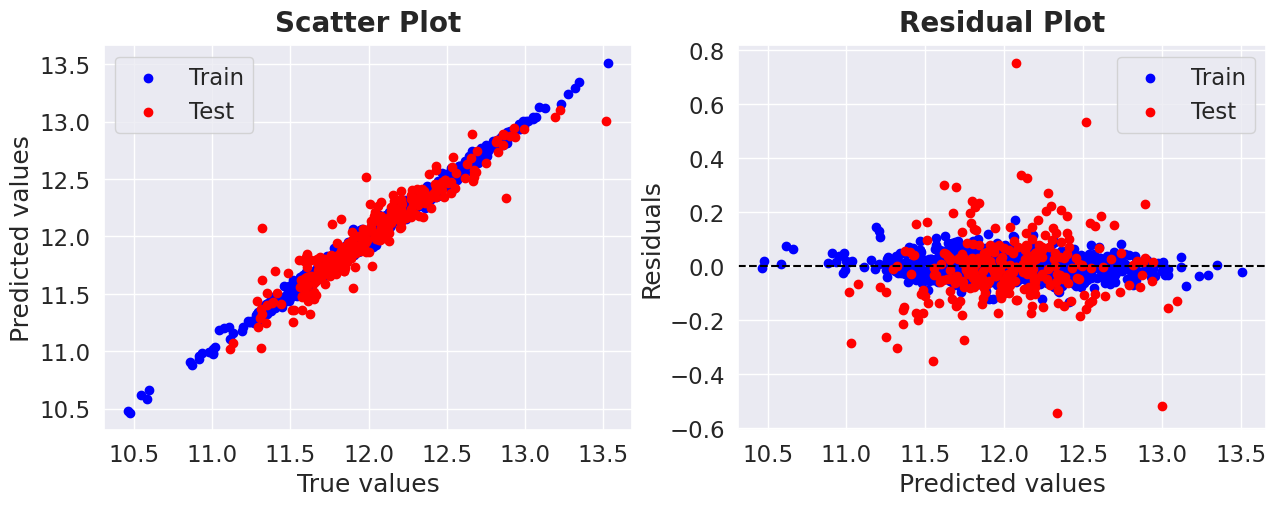

In [319]:
model_evaluation(CatBoostRegressor(verbose=False))

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⚖️ Model's Performance Comparison ⚖️</b></div>

In [320]:
algos = ["LinearRegression","SVR","RandomForestRegresor","AdaBoostRegressor","GradientBosstRegressor",
         "LGBMRegressor","XGBosstRegressor","CatBoostRegressor"]

In [321]:
new_df = pd.DataFrame({"Model":algos,"R2_Score":r2_value,"Adjusted_R2_Score":adjusted_r2_value,
                       "MAE":mae_value,"MSE":mse_value,"RMSE":rmse_value})

In [322]:
new_df

Model  R2_Score  Adjusted_R2_Score       MAE       MSE  \
0        LinearRegression  0.841940           0.691306  0.093221  0.023930   
1                     SVR  0.872596           0.751178  0.096108  0.019289   
2    RandomForestRegresor  0.864926           0.736197  0.098634  0.020450   
3       AdaBoostRegressor  0.801834           0.612978  0.130152  0.030002   
4  GradientBosstRegressor  0.879772           0.765193  0.096733  0.018202   
5           LGBMRegressor  0.875335           0.756526  0.097495  0.018874   
6        XGBosstRegressor  0.868559           0.743294  0.098377  0.019900   
7       CatBoostRegressor  0.897354           0.799531  0.084560  0.015540   

       RMSE  
0  0.154693  
1  0.138884  
2  0.143003  
3  0.173211  
4  0.134916  
5  0.137383  
6  0.141067  
7  0.124661

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **best performing** model is **CatBoostRegressor** with **highest R2 & Adjusted_R2 Scores** and **lowest MAE,MSE,RMSE** values.
    
* The **second & third best performing model** is **GradientBoostingRegressor** & **LGBMRegressor** models.
* So we will perform **Hyper-Parameter-Tunning** on this three model **to obatain more accurate results.**

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⚖️ Model Hyper-Parameter Tunnin ⚖️</b></div>

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 1px; color:black; font-size:150%; text-align:center;padding: 0px;">1. Hyper-Parameter Tunning of CatBoost Regressor Model.

In [323]:
catboost_model = CatBoostRegressor(verbose=False)

In [324]:
parameters1 = {"n_estimators":[50,100,150],
               "random_state":[0,42,50],
               "learning_rate":[0.1,0.3,0.5,1.0]}

In [325]:
grid_search = GridSearchCV(catboost_model, parameters1 , cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7ec72441dcc0>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [326]:
best_parameters = grid_search.best_params_
best_parameters

{'learning_rate': 0.1, 'n_estimators': 150, 'random_state': 50}

### Creating CatBoost Regressor model using Best Parameters.

In [327]:
catboost_model = CatBoostRegressor(**best_parameters, verbose=False)

In [328]:
catboost_model.fit(x_train,y_train)

In [329]:
y_pred = catboost_model.predict(x_test)

In [330]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8987287155526908
RMSE Score of model is: 0.1238235708633781
Adjusted_R2_Score of model is: 0.8022151424552553


---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 1px; color:black; font-size:150%; text-align:center;padding: 0px;">2. Hyper-Parameter Tunning of Gradient Boosting Regressor Model.

In [331]:
gradient_model = GradientBoostingRegressor()

In [332]:
parameters2 = {"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
               "learning_rate":[0.1,0.3,0.5,1.0],
               "n_estimators":[50,100,150],
               "random_state":[0,42,45,50]}

In [ ]:
grid_search_2 = GridSearchCV(gradient_model, parameters2, cv=5)
grid_search_2.fit(x_train,y_train)

In [ ]:
best_parameters2 = grid_search_2.best_params_
best_parameters2


### Creating GradientBossting Regressor Model Using Best-Parameters.

In [ ]:
gradient_model = GradientBoostingRegressor(**best_parameters)

In [ ]:
gradient_model.fit(x_train,y_train)

In [ ]:
y_pred2 = gradient_model.predict(x_test)

In [ ]:
print("R2_Score of model is:",r2_score(y_test,y_pred2))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred2))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

----

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: aliceblue; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 1px; color:black; font-size:150%; text-align:center;padding: 0px;">3. Hyper-Parameter Tunning of LGBM Regressor Model.

In [ ]:
lgbm_model = LGBMRegressor()

In [ ]:
parameters3 = {"boosting_type":['gbdt','dart','goss','rf'],
               "learning_rate":[0.1,0.3,0.5,1.0],
               "random_state":[0,42,45,50]}

In [ ]:
grid_search_3 = GridSearchCV(lgbm_model, parameters3, cv=5)
grid_search_3.fit(x_train,y_train)

In [ ]:
best_parameters3 = grid_search_3.best_params_
best_parameters3

### Creating LGBM Model using Best Parameters.

In [ ]:
lgbm_model = LGBMRegressor(**best_parameters3)

In [ ]:
lgbm_model.fit(x_train,y_train)

In [ ]:
y_pred3 = lgbm_model.predict(x_test)

In [ ]:
print("R2_Score of model is:",r2_score(y_test,y_pred3))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred3))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🍀 Creating Stacked Model 🍀</b></div>

In [ ]:
stack_model = StackingCVRegressor(regressors=(catboost_model,gradient_model,lgbm_model),
                                  meta_regressor = catboost_model,
                                  use_features_in_secondary=True)

In [ ]:
stack_model.fit(x_train,y_train)

In [ ]:
y_pred = stack_model.predict(x_test)

In [ ]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>
    
* The model demonstrates a strong correlation **(R2 Score) of 0.876** between predicted and actual house prices.
* The **RMSE Score of 0.137** indicates a low average error in the model's predictions.
* The **Adjusted R2 Score of 0.756** accounts for the number of predictors in the model, providing a reliable measure of its performance.
* These results highlight the model's **high accuracy and reliability** in predicting house prices.
* The model's performance can guide **homeowners, buyers, and real estate professionals in making informed decisions** regarding property values.

---

# <div style="padding:20px;color:white;margin:0;font-size:32px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🌼  Predicting Test Datset using Stacked Model 🌼 </b></div>

In [ ]:
test_preds = stack_model.predict(test_df)

In [ ]:
sdf = test_id.to_frame()
sdf["SalePrice"] = np.floor(np.expm1(test_preds))

In [ ]:
sdf

---

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🎈 Conclusion 🎈</b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">


<h3 align="left"><font color=purple>📝 Key Findings:</font></h3><br>
    
1. Features like <b>`1stFlrSF`</b>,<b>`GrLivArea`</b>,and <b>`GarageArea`</b> are having <b>strong relation</b> with the target variable.<br>
2. The <b>best performing</b> model is <b>CatBoostRegressor</b> with <b>highest R2 & Adjusted_R2 Scores</b> and <b>lowest MAE,MSE,RMSE</b> values.<br>
3. The <b>second & third best performing model</b> is <b>GradientBoostingRegressor</b> & <b>LGBMRegressor</b> models.<br>
4. The <b>stacked model performance</b> was impressive becuase of <b>hight accuracy and low error rates</b>.<br>
5. The project developed a house price prediction model with <b>strong performance metrics.</b><br>
6. The project effectively addresses the task of house price prediction and contributes as a <b>valuable tool</b> in the dynamic real estate industry.<br>

---